In [ ]:
import gdown
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import plotly.express as px
from wordcloud import WordCloud
import scipy.stats as stats
from scipy.stats import f_oneway
import numpy as np
from scipy.stats import  levene,kruskal

In [ ]:
!gdown 1z7LNsYZT4S_dKxJBt57m0OKcLDLKgS2p
df = pd.read_csv("layoffs.csv")
df

Downloading...
From: https://drive.google.com/uc?id=1z7LNsYZT4S_dKxJBt57m0OKcLDLKgS2p
To: /content/layoffs.csv
100% 222k/222k [00:00<00:00, 3.92MB/s]


company        location        industry  total_laid_off  \
0     Karat Financial     Los Angeles         Finance             NaN   
1     Hippo Insurance     SF Bay Area         Finance           120.0   
2              Graphy       Bengaluru       Education            50.0   
3             Salsify          Boston          Retail           110.0   
4           F-Secure         Helsinki        Security            70.0   
...               ...             ...             ...             ...   
3130          Service     Los Angeles          Travel             NaN   
3131     HopSkipDrive     Los Angeles  Transportation             8.0   
3132      Panda Squad     SF Bay Area        Consumer             6.0   
3133    Tamara Mellon     Los Angeles          Retail            20.0   
3134         EasyPost  Salt Lake City       Logistics            75.0   

      percentage_laid_off        date       stage        country  funds_raised  
0                     NaN  2023-10-27    Series B  United States         116.0  
1                    0.20  2023-10-26    Post-IPO  United States        1300.0  
2                    0.20  2023-10-26  Subsidiary          India           NaN  
3                     NaN  2023-10-25     Unknown  United States         453.0  
4                     NaN  2023-10-25    Post-IPO        Finland           NaN  
...                   ...         ...         ...            ...           ...  
3130                 1.00  2020-03-16        Seed  United States           5.1  
3131                 0.10  2020-03-13     Unknown  United States          45.0  
3132                 0.75  2020-03-13        Seed  United States           1.0  
3133                 0.40  2020-03-12    Series C  United States          90.0  
3134                  NaN  2020-03-11    Series A  United States          12.0  

[3135 rows x 9 columns]

## THĂM DÒ DỮ LIỆU

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3135 entries, 0 to 3134
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   company              3135 non-null   object 
 1   location             3134 non-null   object 
 2   industry             3134 non-null   object 
 3   total_laid_off       2095 non-null   float64
 4   percentage_laid_off  2034 non-null   float64
 5   date                 3135 non-null   object 
 6   stage                3128 non-null   object 
 7   country              3135 non-null   object 
 8   funds_raised         2809 non-null   float64
dtypes: float64(3), object(6)
memory usage: 220.6+ KB


In [ ]:
df.describe()

total_laid_off  percentage_laid_off   funds_raised
count     2095.000000          2034.000000    2809.000000
mean       242.388544             0.272555     769.205944
std        779.567309             0.273965    4995.912735
min          3.000000             0.000000       0.000000
25%         40.000000             0.100000      50.000000
50%         80.000000             0.170000     157.000000
75%        180.000000             0.300000     442.000000
max      12000.000000             1.000000  121900.000000

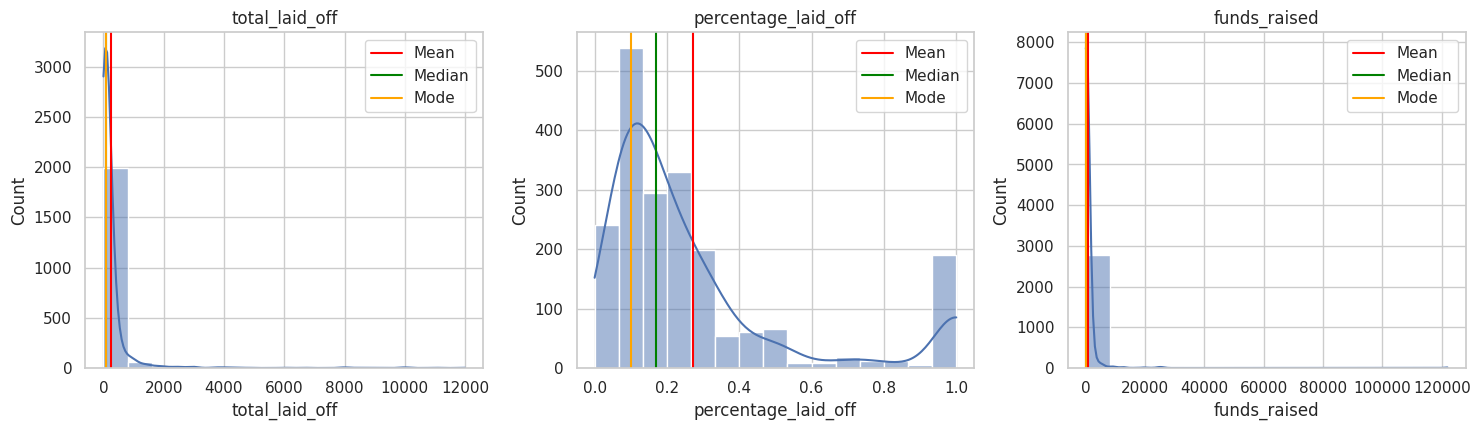

In [ ]:
numeric_columns = list(df.select_dtypes(include=['float64','int64']).columns)
plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], bins=15, kde=True)
    plt.axvline(df[col].mean(), color='red', label='Mean')
    plt.axvline(df[col].median(), color='green', label='Median')
    plt.axvline(df[col].mode()[0], color='orange', label='Mode')
    plt.title(col)
    plt.legend()

plt.tight_layout()
plt.show()

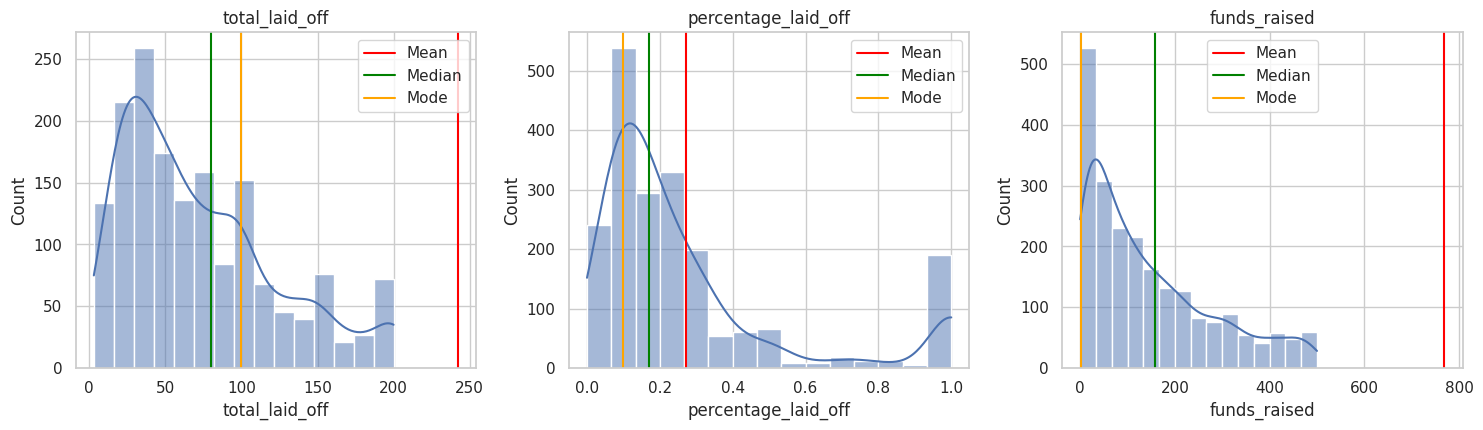

In [ ]:
# Filtering out values greater than 1000 for 'total_laid_off' and 'funds_raised' before plotting
filtered_df = df.copy()
filtered_df.loc[filtered_df['total_laid_off'] > 200, 'total_laid_off'] = None
filtered_df.loc[filtered_df['funds_raised'] > 500, 'funds_raised'] = None

plt.figure(figsize=(15, 8))

for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(filtered_df[col], bins=15, kde=True)

    plt.axvline(df[col].mean(), color='red', label='Mean')
    plt.axvline(df[col].median(), color='green', label='Median')
    plt.axvline(df[col].mode()[0], color='orange', label='Mode')
    plt.title(col)
    plt.legend()

plt.tight_layout()
plt.show()



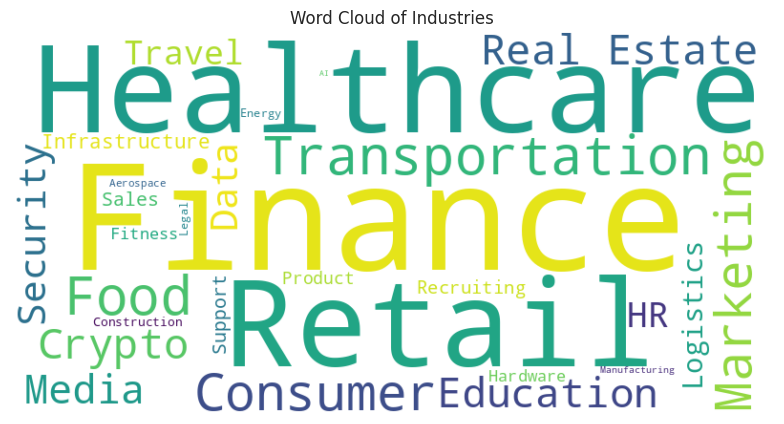

In [ ]:
industry_text = ' '.join(df['industry'].dropna().astype(str))

wordcloud_industry = WordCloud(width=800, height=400, background_color='white').generate(industry_text)

# Plotting the word clouds
fig, ax = plt.subplots(figsize=(8, 5))

# Industry word cloud
ax.imshow(wordcloud_industry, interpolation='bilinear')
ax.axis('off')
ax.set_title('Word Cloud of Industries')

plt.tight_layout()
plt.show()


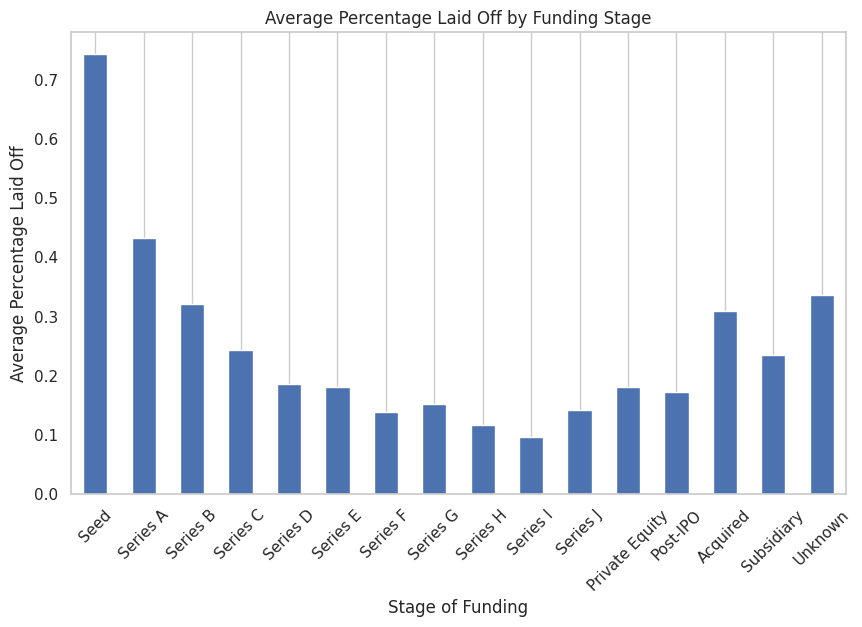

In [ ]:
# Mapping the stages of funding to an ordered list
stage_order = ['Seed', 'Series A', 'Series B', 'Series C', 'Series D', 'Series E',
               'Series F', 'Series G', 'Series H', 'Series I', 'Series J',
               'Private Equity', 'Post-IPO', 'Acquired', 'Subsidiary', 'Unknown']

# Creating a categorical type for 'stage' column with the specified order
df['stage'] = pd.Categorical(df['stage'], categories=stage_order, ordered=True)

# Calculating the average percentage laid off for each ordered stage of funding
average_laid_off_ordered = df.groupby('stage')['percentage_laid_off'].mean()

# Plotting
plt.figure(figsize=(10,6))
average_laid_off_ordered.plot(kind='bar')
plt.title('Average Percentage Laid Off by Funding Stage')
plt.xlabel('Stage of Funding')
plt.ylabel('Average Percentage Laid Off')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()


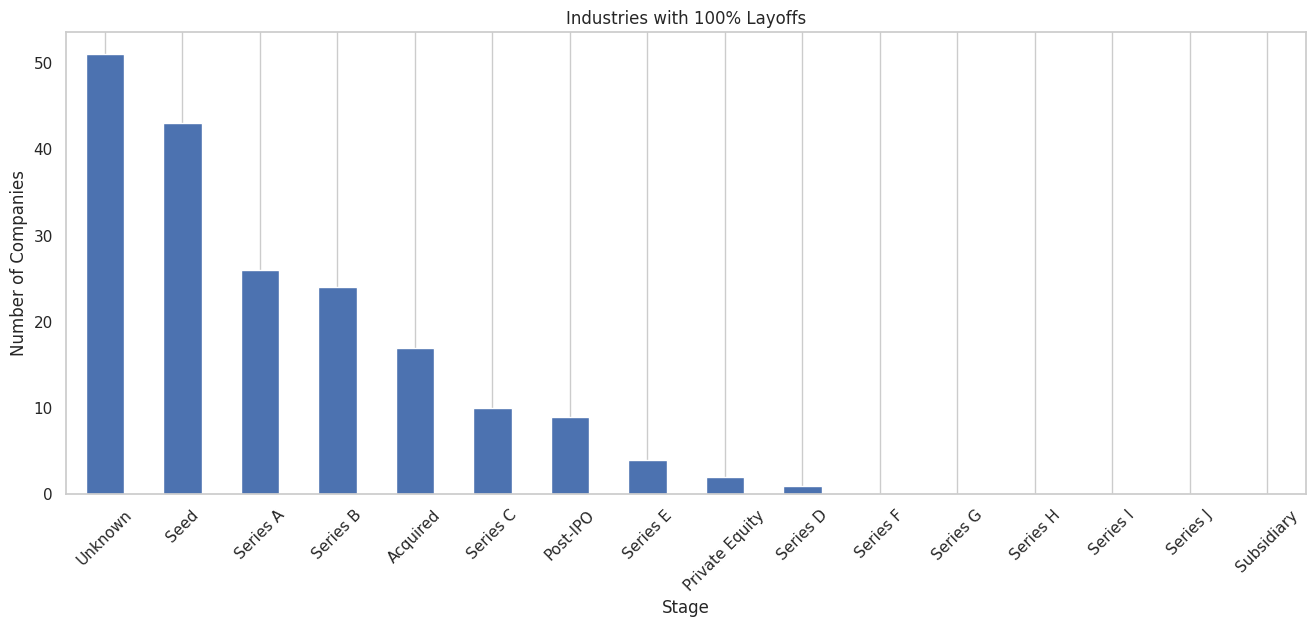

In [ ]:
bankrupt = df[df["percentage_laid_off"] == 1.0]
plot_data = bankrupt['stage'].value_counts()

# Plotting
plt.figure(figsize=(16,6))
plot_data.plot(kind='bar')
plt.title('Industries with 100% Layoffs')
plt.xlabel('Stage')
plt.ylabel('Number of Companies')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()


In [ ]:
df.country.value_counts()

United States     2020
India              225
Canada             128
United Kingdom     106
Germany             89
                  ... 
Philippines          1
Belgium              1
Greece               1
Ukraine              1
Myanmar              1
Name: country, Length: 63, dtype: int64

In [ ]:
# Categorizing the 'country' column into 'United States' and 'Others'
df_ct = df.copy()
df_ct["country_type"] = df_ct['country'].apply(lambda x: 'United States' if x == 'United States' else 'Others')

country_stage_counts = df_ct.groupby(['country_type', 'stage']).size().reset_index(name='Count')
country_stage_counts = country_stage_counts[country_stage_counts['Count'] > 0]
# Creating a treemap with Plotly Express
fig = px.treemap(country_stage_counts, path=['country_type', 'stage'],values="Count",
                 title='Treemap of Company Stages by Country Type',
                 height=800, width=900, branchvalues='total', maxdepth=2,
                 color='Count',
                 color_continuous_scale='Blues'  # Using a blue color scale
                )

# Updating text display and removing space between blocks
fig.update_traces(texttemplate='%{label}<br>%{value} companies<br>%{percentParent:.2%}', tiling=dict(pad=0))

# Display the treemap
fig.show()

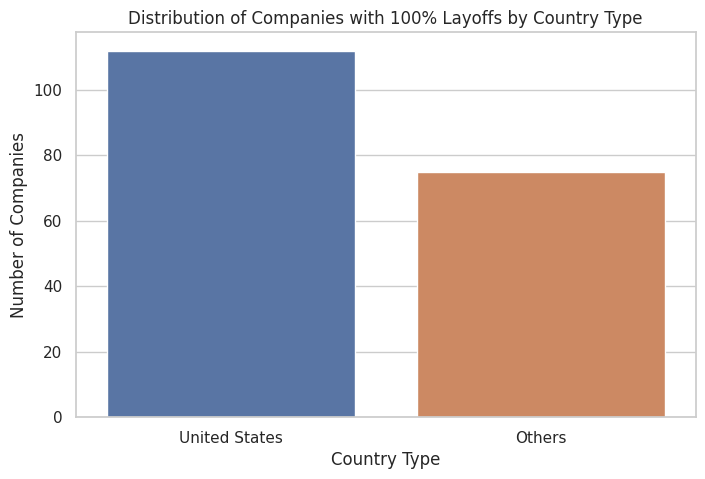

In [ ]:
df_filtered = df_ct[df_ct['percentage_laid_off'] == 1]

# Count the number of such companies in 'United States' and 'Others'
distribution = df_filtered['country_type'].value_counts()

# Plotting the distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=distribution.index, y=distribution.values)

# Adding labels and title
plt.title('Distribution of Companies with 100% Layoffs by Country Type')
plt.xlabel('Country Type')
plt.ylabel('Number of Companies')

# Showing the plot
plt.show()

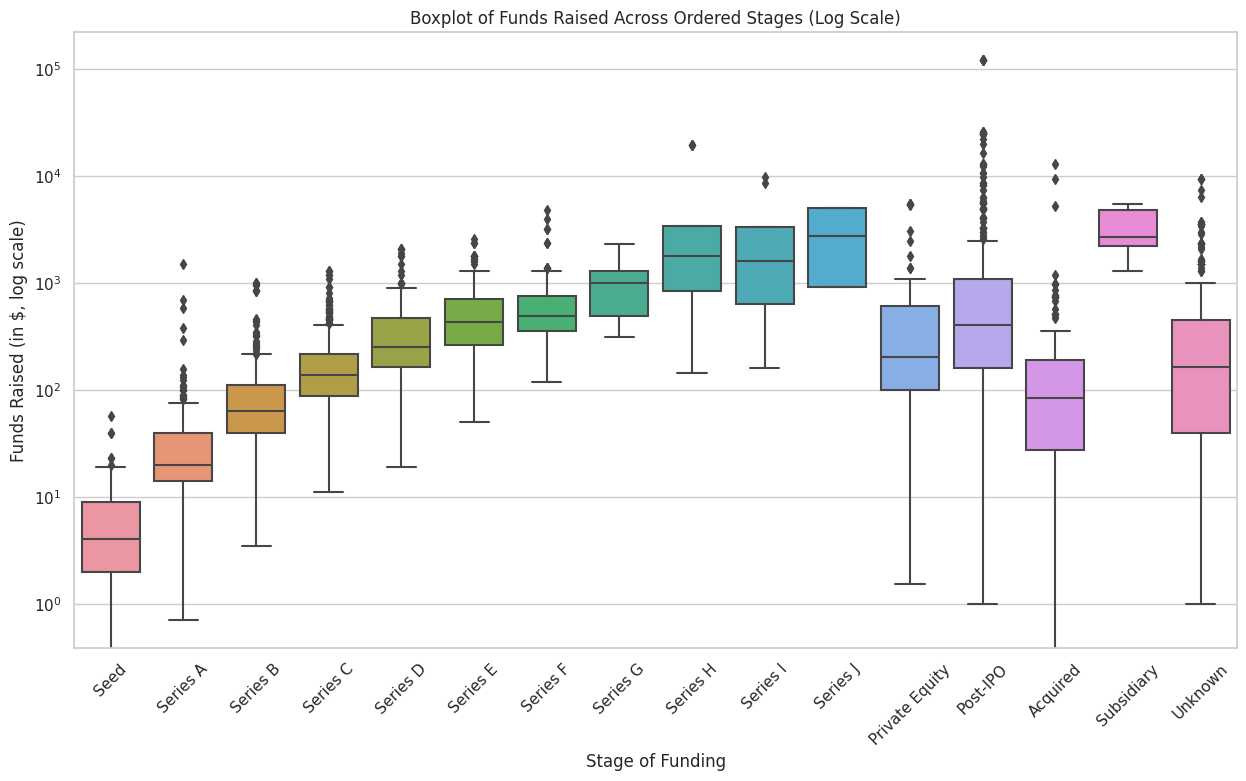

In [ ]:
stage_order = ['Seed', 'Series A', 'Series B', 'Series C', 'Series D', 'Series E',
               'Series F', 'Series G', 'Series H', 'Series I', 'Series J',
               'Private Equity', 'Post-IPO', 'Acquired', 'Subsidiary', 'Unknown']

df['stage'] = pd.Categorical(df['stage'], categories=stage_order, ordered=True)

plt.figure(figsize=(15, 8))
sns.boxplot(x='stage', y='funds_raised', data=df, order=stage_order)
plt.yscale('log')  # Setting the y-axis to a logarithmic scale
plt.xticks(rotation=45)
plt.title('Boxplot of Funds Raised Across Ordered Stages (Log Scale)')
plt.xlabel('Stage of Funding')
plt.ylabel('Funds Raised (in $, log scale)')
plt.show()


In [ ]:
df_filtered_percentage = df.dropna(subset=['percentage_laid_off', 'stage'])
df_filtered_total = df.dropna(subset=['total_laid_off', 'stage'])
df_filtered_funds = df.dropna(subset=['funds_raised', 'stage'])

# Grouping the data by 'stage' and collecting values for each group
groups_percentage = [group['percentage_laid_off'].values for name, group in df_filtered_percentage.groupby('stage')]
groups_total = [group['total_laid_off'].values for name, group in df_filtered_total.groupby('stage')]
groups_funds = [group['funds_raised'].values for name, group in df_filtered_funds.groupby('stage')]




In [ ]:
levene_test_percentage = levene(*groups_percentage)
levene_test_total = levene(*groups_total)
levene_test_funds = levene(*groups_funds)

levene_test_percentage.pvalue, levene_test_total.pvalue, levene_test_funds.pvalue



(9.757446184638203e-24, 1.213371380836451e-17, 4.636345577611767e-11)

In [ ]:
kruskal_test_percentage = kruskal(*groups_percentage)
kruskal_test_total = kruskal(*groups_total)
kruskal_test_funds = kruskal(*groups_funds)

kruskal_test_percentage.pvalue, kruskal_test_total.pvalue, kruskal_test_funds.pvalue


(2.468687799706425e-72, 3.488695708490157e-87, 2.4811863612462665e-252)

In [ ]:
# Check for Normality
for column in ['percentage_laid_off', 'funds_raised', 'total_laid_off']:
    stat, p_value = stats.shapiro(df_ct[column].dropna())
    print(f'Normality test for {column}: Stat={stat}, P-value={p_value}')

# Check for Equal Variances
for column in ['percentage_laid_off', 'funds_raised', 'total_laid_off']:
    stat, p_value = stats.levene(df_ct[df_ct['country_type'] == 'United States'][column].dropna(),
                                 df_ct[df_ct['country_type'] == 'Others'][column].dropna())
    print(f'Levene test for {column}: Stat={stat}, P-value={p_value}')

Normality test for percentage_laid_off: Stat=0.7259092330932617, P-value=0.0
Normality test for funds_raised: Stat=0.0952599048614502, P-value=0.0
Normality test for total_laid_off: Stat=0.24278318881988525, P-value=0.0
Levene test for percentage_laid_off: Stat=5.6946557970925555, P-value=0.017107689592384196
Levene test for funds_raised: Stat=0.38887663144598345, P-value=0.5329411520171935
Levene test for total_laid_off: Stat=1.4018560214782183, P-value=0.2365475041944296


In [ ]:
# Mann-Whitney U test for each variable
for column in ['percentage_laid_off', 'funds_raised', 'total_laid_off']:
    stat, p_value = stats.mannwhitneyu(df_ct[df_ct['country_type'] == 'United States'][column].dropna(),
                                       df_ct[df_ct['country_type'] == 'Others'][column].dropna())
    print(f'Mann-Whitney U test for {column}: Stat={stat}, P-value={p_value}')

Mann-Whitney U test for percentage_laid_off: Stat=431701.0, P-value=0.001482631937735252
Mann-Whitney U test for funds_raised: Stat=992601.5, P-value=2.54721528695561e-07
Mann-Whitney U test for total_laid_off: Stat=500703.5, P-value=0.37459548133575016


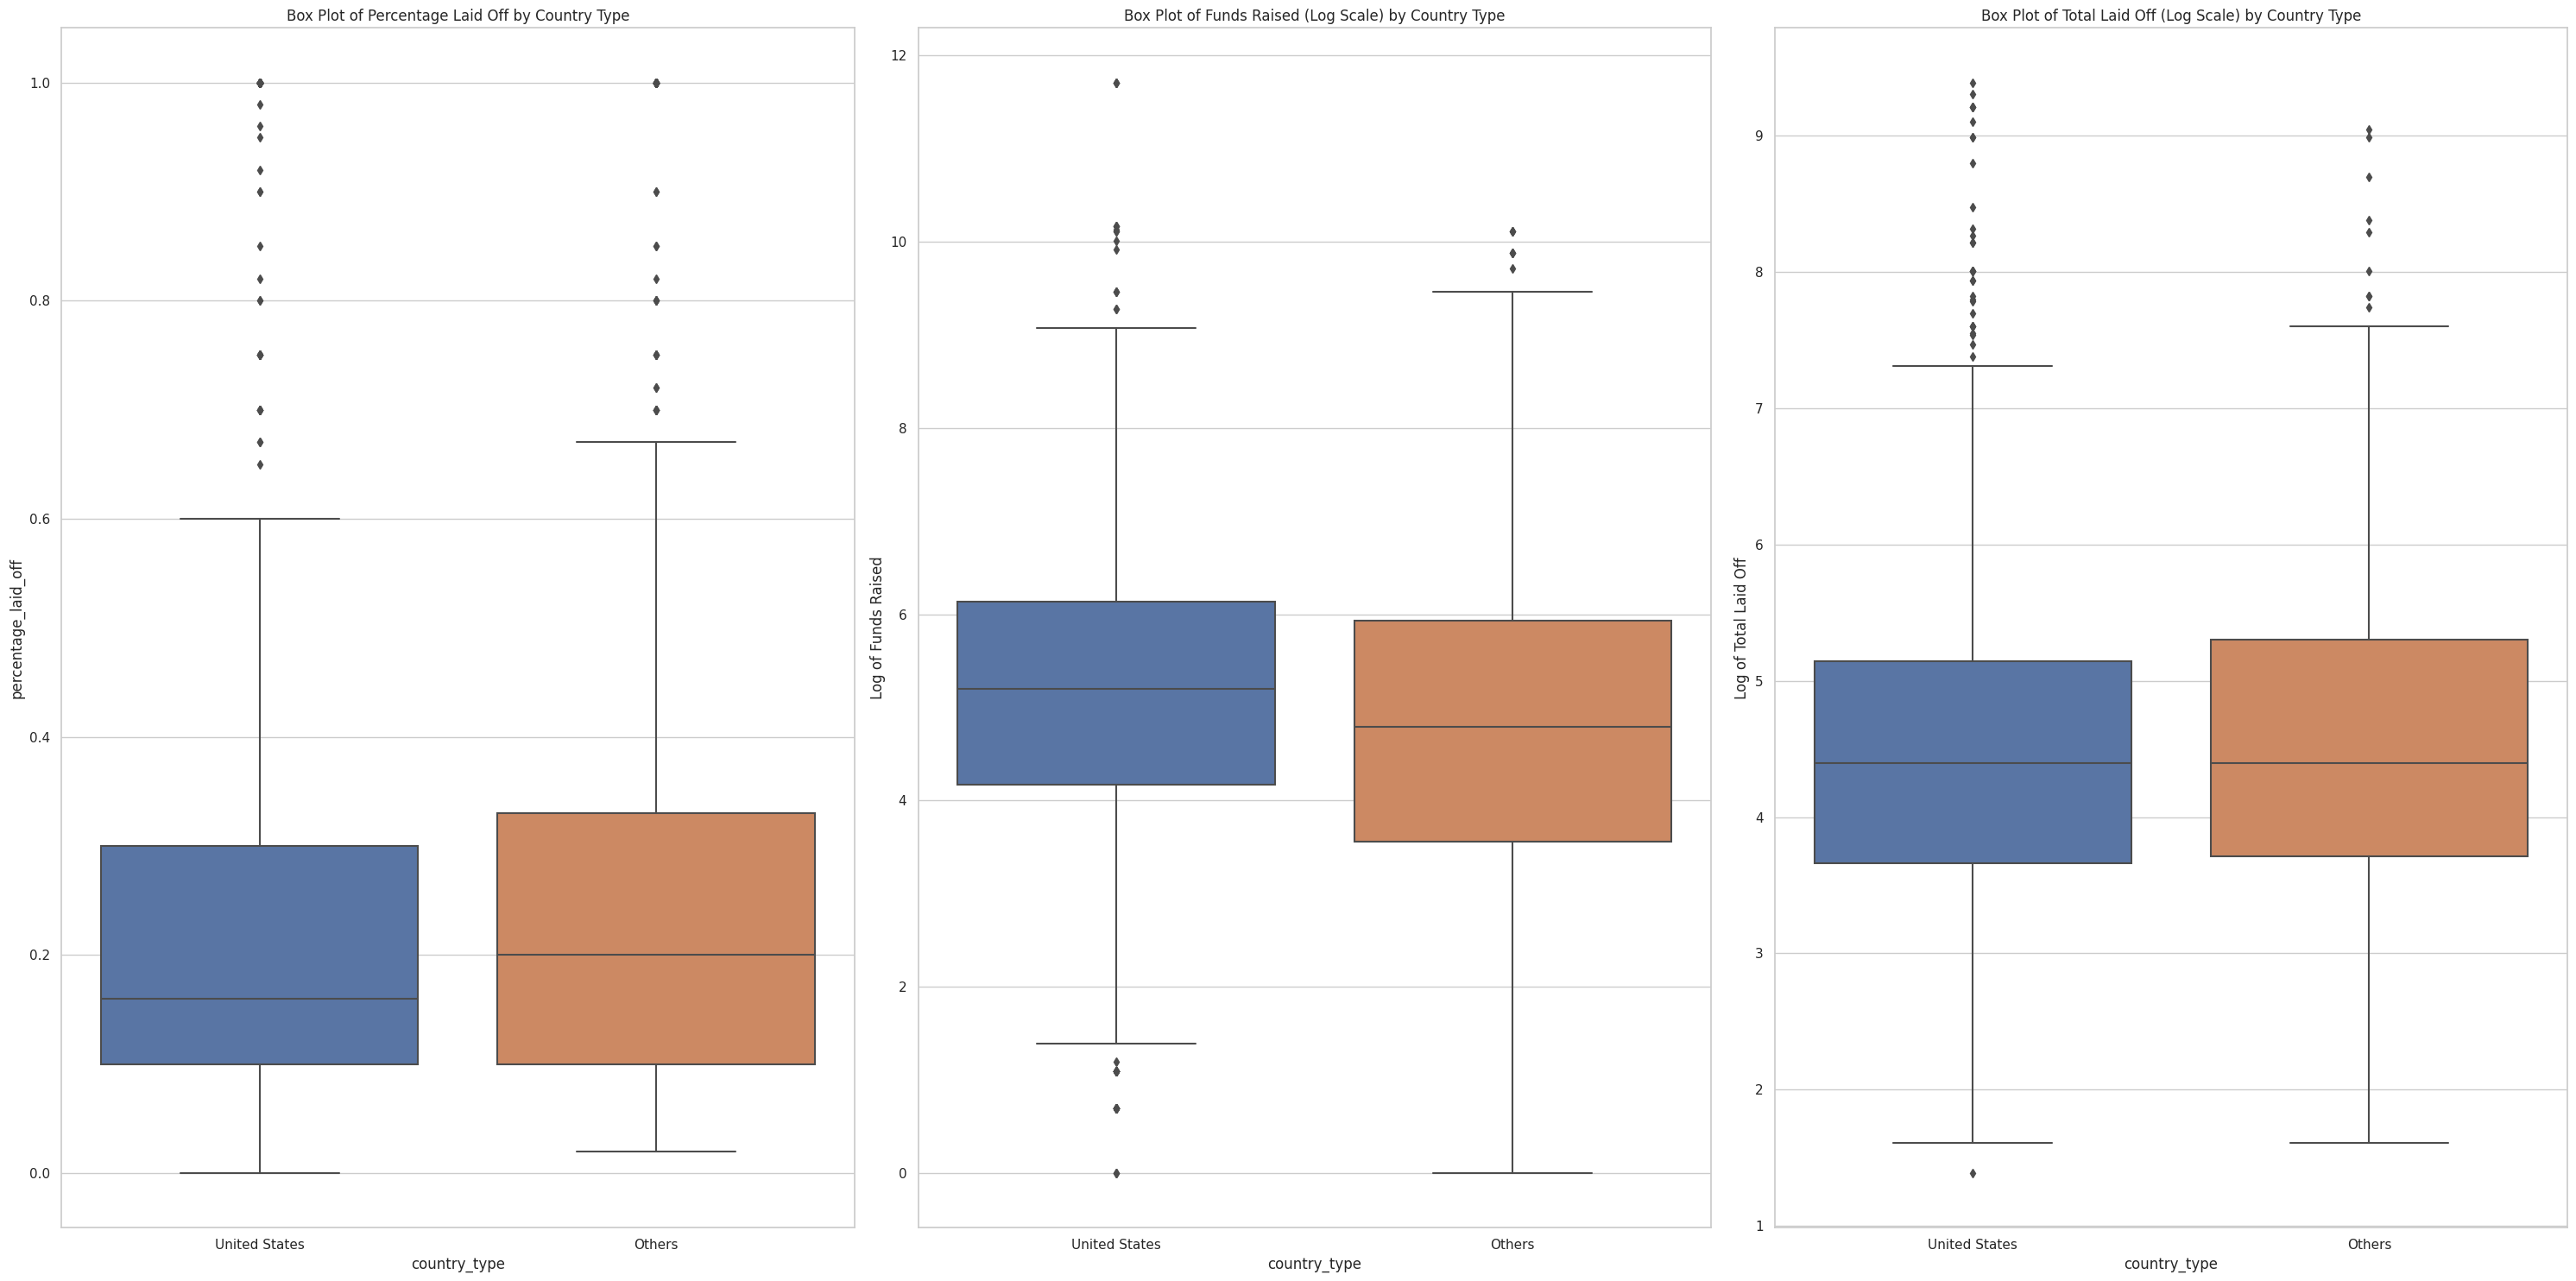

In [ ]:
sns.set(style="whitegrid")
# Creating a figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(30, 15))  # 1 row, 3 columns
# Box plot for 'percentage_laid_off'
sns.boxplot(x='country_type', y='percentage_laid_off', data=df_ct, ax=axes[0])
axes[0].set_title('Box Plot of Percentage Laid Off by Country Type')

# Box plot for 'funds_raised' with log scale
# Adding a small value to avoid log(0) error
df_ct['funds_raised_log'] = np.log(df_ct['funds_raised'] + 1)
sns.boxplot(x='country_type', y='funds_raised_log', data=df_ct, ax=axes[1])
axes[1].set_title('Box Plot of Funds Raised (Log Scale) by Country Type')
axes[1].set_ylabel('Log of Funds Raised')

# Box plot for 'total_laid_off' with log scale
df_ct['total_laid_off_log'] = np.log(df_ct['total_laid_off'] + 1)
sns.boxplot(x='country_type', y='total_laid_off_log', data=df_ct, ax=axes[2])
axes[2].set_title('Box Plot of Total Laid Off (Log Scale) by Country Type')
axes[2].set_ylabel('Log of Total Laid Off')

# Adjust layout
plt.tight_layout()
plt.show()

## TIỀN XỬ LÝ DỮ LIỆU

###Xử lí tên cột

In [ ]:
# đổi tên cột: xóa "_" và in hoa chữ đầu
df.columns = df.columns.str.replace('_', ' ').str.title()
print(df.columns)

Index(['Company', 'Location', 'Industry', 'Total Laid Off',
       'Percentage Laid Off', 'Date', 'Stage', 'Country', 'Funds Raised'],
      dtype='object')


###Xử lí NaN

In [ ]:
#kiểm tra missing value
df.isna().sum()

Company                   0
Location                  1
Industry                  1
Total Laid Off         1040
Percentage Laid Off    1101
Date                      0
Stage                     7
Country                   0
Funds Raised            326
dtype: int64

In [ ]:
#Loại bỏ những dòng có giá trị NaN ở total_laid_off
df=df.dropna(subset=['Total Laid Off','Industry','Location','Stage']).reset_index()
df=df.drop(columns = 'index')
df.isnull().sum()

Company                  0
Location                 0
Industry                 0
Total Laid Off           0
Percentage Laid Off    595
Date                     0
Stage                    0
Country                  0
Funds Raised           194
dtype: int64

Có thể thấy rằng 3 cột có số dữ liệu bị thiếu là: total_laid_off, percentage_laid_off và funds_raised. Trọng tâm của bài là hướng đến việc phân tích chỉ số total_laid_off của mỗi công ty nên việc thực hiện impute missing values là không khả thi (điều này sẽ gây ra những kết quả sai lệch khi xét đến những đại lượng thống kê). Vì vậy, chúng ta tiến hành loại bỏ những dòng có missing values

###Xử lí kiểu dữ liệu

In [ ]:
df['Total Laid Off'] = df['Total Laid Off'].astype(int)
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df.tail()

Company        Location        Industry  Total Laid Off  \
2086       Help.com          Austin         Support              16   
2087   HopSkipDrive     Los Angeles  Transportation               8   
2088    Panda Squad     SF Bay Area        Consumer               6   
2089  Tamara Mellon     Los Angeles          Retail              20   
2090       EasyPost  Salt Lake City       Logistics              75   

      Percentage Laid Off       Date     Stage        Country  Funds Raised  
2086                 1.00 2020-03-16      Seed  United States           6.0  
2087                 0.10 2020-03-13   Unknown  United States          45.0  
2088                 0.75 2020-03-13      Seed  United States           1.0  
2089                 0.40 2020-03-12  Series C  United States          90.0  
2090                  NaN 2020-03-11  Series A  United States          12.0

###Thêm cột

In [ ]:
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Year'] = df['Date'].dt.year

# Print the first few rows to check
print(df[['Date', 'Day', 'Month', 'Year']].head())


        Date  Day  Month  Year
0 2023-10-26   26     10  2023
1 2023-10-26   26     10  2023
2 2023-10-25   25     10  2023
3 2023-10-25   25     10  2023
4 2023-10-25   25     10  2023


###Kiểm tra duplicate

In [ ]:
#kiểm tra duplicate
df[df.duplicated()]

Company Location        Industry  Total Laid Off  Percentage Laid Off  \
1437   Cazoo   London  Transportation             750                 0.15   

           Date     Stage         Country  Funds Raised  Month  Day  Year  
1437 2022-06-07  Post-IPO  United Kingdom        2000.0      6    7  2022

In [ ]:
#View duplicate
df[df["Company"]=="Cazoo"]
#Nhận thấy 2268 và 2269 trùng nhau

Company Location        Industry  Total Laid Off  Percentage Laid Off  \
1436   Cazoo   London  Transportation             750                 0.15   
1437   Cazoo   London  Transportation             750                 0.15   

           Date     Stage         Country  Funds Raised  Month  Day  Year  
1436 2022-06-07  Post-IPO  United Kingdom        2000.0      6    7  2022  
1437 2022-06-07  Post-IPO  United Kingdom        2000.0      6    7  2022

In [ ]:
#Drop duplicate
df.drop_duplicates(inplace = True)
df[df["Company"]=="Cazoo"]


Company Location        Industry  Total Laid Off  Percentage Laid Off  \
1436   Cazoo   London  Transportation             750                 0.15   

           Date     Stage         Country  Funds Raised  Month  Day  Year  
1436 2022-06-07  Post-IPO  United Kingdom        2000.0      6    7  2022

###Kiểm tra Outliers

In [ ]:
import numpy as np

# Dùng quy tắc 3-sigma kiểm tra Outliers
def check_outliers(column):
    mean = np.mean(column)
    std = np.std(column)
    upper_limit = mean + 3 * std
    lower_limit = mean - 3 * std
    z_scores = [(x - mean) / std for x in column]
    outliers = [x for x in column if x > upper_limit or x < lower_limit]
    return outliers, z_scores

exclude = ['Company',	'Location',	'Industry','Date', 'Stage', 'Country','Month','Day','Year']
count_outliers = 0

for col in df.columns:
    if col not in exclude:
        outliers, z_scores = check_outliers(df[col])
        if len(outliers) > 0:
            count_outliers += len(outliers)
            print(f'Có {len(outliers)} outliers trong cột {col}')
        else:
            print(f'Không có outliers trong cột {col}')

print(f'Có tổng cộng {count_outliers} outliers trong bộ dữ liệu')


Có 26 outliers trong cột Total Laid Off
Có 59 outliers trong cột Percentage Laid Off
Có 15 outliers trong cột Funds Raised
Có tổng cộng 100 outliers trong bộ dữ liệu


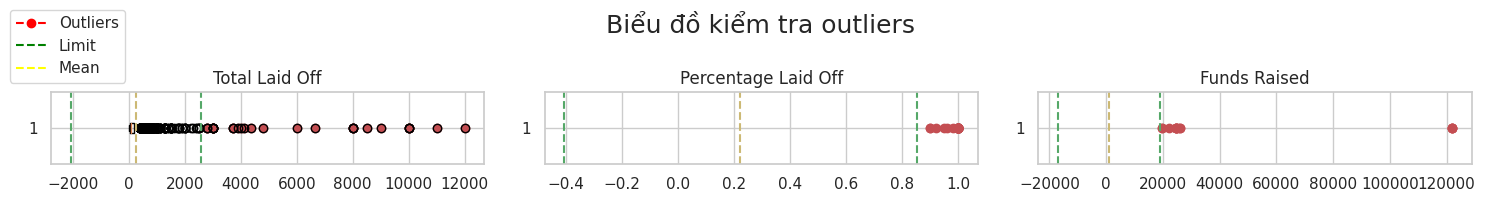

In [ ]:
import matplotlib.lines as mlines

#Vẽ outliers:
def draw_outliers(column, ax):
    ax.boxplot(column, vert=False)
    # Check outlier và đánh dấu
    outliers, _ = check_outliers(column)
    if len(outliers) > 0:
        ax.scatter(outliers, [1] * len(outliers), c='r', marker='o', label='Outliers')
    mean = np.mean(column)
    std = np.std(column)
    upper_limit = mean + 3 * std
    lower_limit = mean - 3 * std

    # Vẽ đường với các màu cụ thể
    ax.axvline(mean, color='y', linestyle='--')
    ax.axvline(lower_limit, color='g', linestyle='--')
    ax.axvline(upper_limit, color='g', linestyle='--')

fig, axs = plt.subplots(1, 3, figsize=(15, 2))
fig.suptitle('Biểu đồ kiểm tra outliers', fontsize=18)

selected_col = []
for col in df.columns:
    if col not in exclude:
        selected_col.append(col)

for i, col in enumerate(selected_col):
    draw_outliers(df[col], axs[i])
    axs[i].set_title(col)

# Tạo chú thích
red_dot = mlines.Line2D([], [], color='red', marker='o', linestyle='--', label='Outliers')
green_line = mlines.Line2D([], [], color='green', linestyle='--', label='Limit')
yellow_line = mlines.Line2D([], [], color='yellow', linestyle='--', label='Mean')
fig.legend(handles=[red_dot, green_line, yellow_line], loc='upper left', bbox_to_anchor=(0, 1), borderaxespad=0.)

plt.tight_layout()
plt.show()



*   Total Laid Off: Có một số outliers ở phía trên, cho thấy có một số trường hợp công ty sa thải số lượng nhân viên rất lớn so với phần còn lại.
*   Percentage Laid Off: Cũng có một số số outliers, với một số công ty sa thải một tỷ lệ lớn nhân viên.
*   Funds raised: Có nhiều số outliers ở phía trên, cho thấy có một số công ty đã gọi vốn thành công với số lượng rất lớn.


###Hoàn thiện bộ dữ liệu

In [ ]:
df.to_csv('trainptdl.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2090 entries, 0 to 2090
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Company              2090 non-null   object        
 1   Location             2090 non-null   object        
 2   Industry             2090 non-null   object        
 3   Total Laid Off       2090 non-null   int64         
 4   Percentage Laid Off  1495 non-null   float64       
 5   Date                 2090 non-null   datetime64[ns]
 6   Stage                2090 non-null   category      
 7   Country              2090 non-null   object        
 8   Funds Raised         1896 non-null   float64       
 9   Month                2090 non-null   int64         
 10  Day                  2090 non-null   int64         
 11  Year                 2090 non-null   int64         
dtypes: category(1), datetime64[ns](1), float64(2), int64(4), object(4)
memory usage: 198.6+ KB

#PHÂN TÍCH DỮ LIỆU

## PHÂN TÍCH MÔ TẢ (DESCRIPTIVE ANALYSIS)

In [ ]:
df_date = df.set_index('Date')

In [ ]:
df_before = df_date.loc[(df_date.index < '2019-12-01')]
df_covid19 = df_date.loc[(df_date.index >= '2019-12-01')&(df_date.index < '2021-02-01')]
df_after = df_date.loc[(df_date.index >= '2021-02-01')]


In [ ]:
df_covid19.describe()

Total Laid Off  Percentage Laid Off  Funds Raised       Month  \
count      483.000000           365.000000    445.000000  483.000000   
mean       181.803313             0.274884    654.187540    4.577640   
std        411.293825             0.234961   2775.320498    1.719933   
min          3.000000             0.010000      0.000000    1.000000   
25%         25.000000             0.110000     36.000000    4.000000   
50%         60.000000             0.200000     90.000000    4.000000   
75%        150.000000             0.330000    263.000000    5.000000   
max       4375.000000             1.000000  24700.000000   12.000000   

              Day         Year  
count  483.000000   483.000000  
mean    15.318841  2020.016563  
std      9.695456     0.127760  
min      1.000000  2020.000000  
25%      7.000000  2020.000000  
50%     15.000000  2020.000000  
75%     24.000000  2020.000000  
max     31.000000  2021.000000

In [ ]:
df_after.describe()

Total Laid Off  Percentage Laid Off   Funds Raised        Month  \
count     1607.000000          1130.000000    1451.000000  1607.000000   
mean       260.663348             0.206509     998.394831     6.264468   
std        860.198012             0.197938    6647.606846     3.329423   
min          5.000000             0.000000       0.000000     1.000000   
25%         40.000000             0.090000      73.500000     3.000000   
50%         87.000000             0.150000     208.000000     6.000000   
75%        180.500000             0.250000     534.000000     9.000000   
max      12000.000000             1.000000  121900.000000    12.000000   

               Day         Year  
count  1607.000000  1607.000000  
mean     15.190417  2022.462974  
std       9.064448     0.526713  
min       1.000000  2021.000000  
25%       7.000000  2022.000000  
50%      15.000000  2022.000000  
75%      23.000000  2023.000000  
max      31.000000  2023.000000

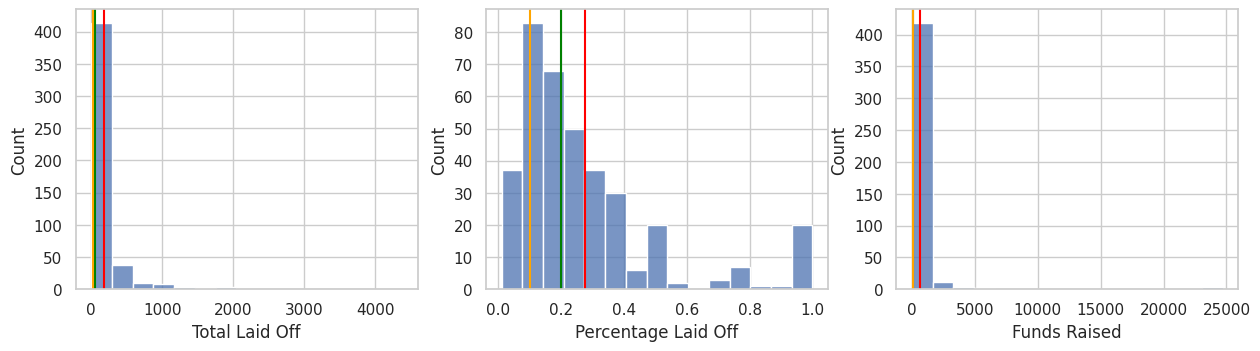

In [ ]:
numeric_columns = df[["Total Laid Off","Percentage Laid Off","Funds Raised"]]
plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df_covid19[col],bins=15)
    plt.axvline(df_covid19[col].mean(), color='red')
    plt.axvline(df_covid19[col].median(), color='green')
    plt.axvline(df_covid19[col].mode()[0], color='orange')

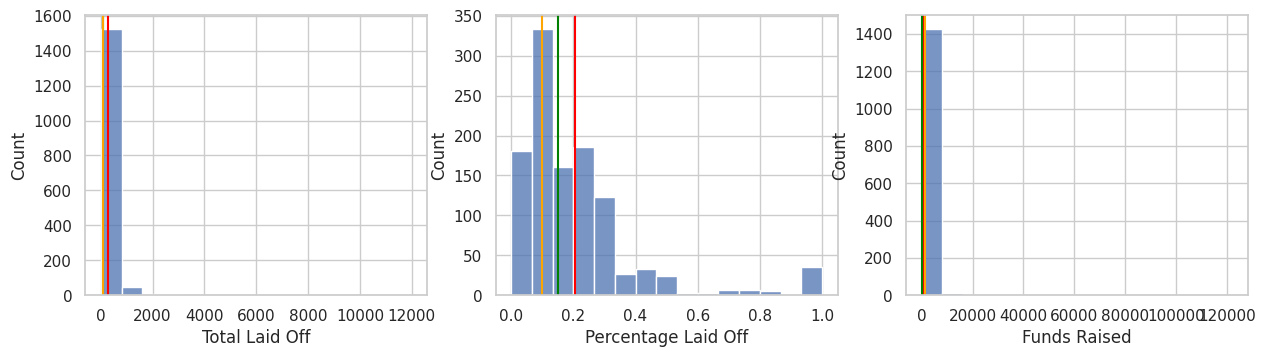

In [ ]:
plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df_after[col],bins=15)
    plt.axvline(df_after[col].mean(), color='red')
    plt.axvline(df_after[col].median(), color='green')
    plt.axvline(df_after[col].mode()[0], color='orange')

In [ ]:

industry = df.groupby('Industry')['Total Laid Off'].sum().astype(int)
industry_sorted = industry.sort_values()

# In kết quả
print(industry_sorted)

Industry
AI                   80
Aerospace           893
Legal               966
Energy             1247
Manufacturing      1370
Product            1777
Construction       3863
Recruiting         4872
Logistics          5068
Support            6075
HR                 6497
Infrastructure     6774
Data               7175
Media              7232
Security           8922
Fitness            9051
Marketing         11911
Crypto            13408
Sales             13753
Education         16921
Real Estate       18946
Travel            19510
Hardware          27219
Healthcare        33952
Finance           36251
Food              39767
Transportation    39837
Other             44740
Consumer          58447
Retail            60173
Name: Total Laid Off, dtype: int64


In [ ]:
funds_raised = df.groupby('Industry')['Funds Raised'].sum().astype(int)
funds_raised

Industry
AI                   193
Aerospace           4159
Construction        5379
Consumer          183666
Crypto             18067
Data               21566
Education          32863
Energy              2365
Finance           124779
Fitness            12649
Food              103680
HR                  7600
Hardware            7557
Healthcare         53346
Infrastructure      6050
Legal               2637
Logistics          19140
Manufacturing       2598
Marketing          17297
Media             504714
Other              44436
Product             6585
Real Estate        93525
Recruiting          3489
Retail             66937
Sales               8515
Security           21868
Support             5900
Transportation    318078
Travel             40140
Name: Funds Raised, dtype: int64

##Phân tích tương quan (Correlations)

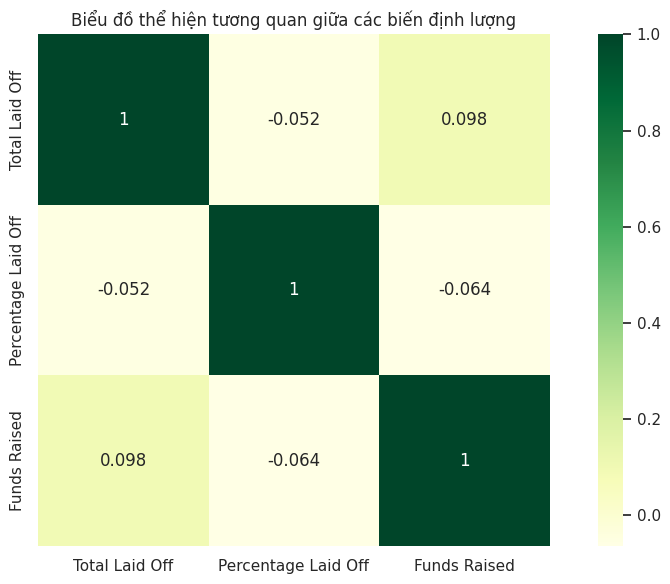

In [ ]:
# Tạo ma trận tương quan Pearson giữa các biến
correlation_matrix = df[["Total Laid Off","Percentage Laid Off","Funds Raised"]].corr()
#Chỉnh size
plt.figure(figsize=(10, 6))
# Định nghĩa bảng màu
cmap = sns.color_palette("YlGn", as_cmap=True)
# Vẽ heatmap
sns.heatmap(correlation_matrix, annot=True,cmap=cmap, square=True)
plt.title('Biểu đồ thể hiện tương quan giữa các biến định lượng')
plt.tight_layout()
plt.savefig('heatmap.pdf', format='pdf')
plt.show()

##Top 10 công ty sa thải nhiều nhất

In [ ]:
#10 công ty sa thải nhiều nhất
company = df.groupby('Company')['Total Laid Off'].sum().astype(int)
company_sorted = company.nlargest(10)
# In kết quả
print(company_sorted)

Company
Amazon        27230
Meta          21000
Google        12040
Microsoft     11158
Salesforce    10140
Philips       10000
Ericsson       8500
Flink          8100
Uber           7785
Micron         7200
Name: Total Laid Off, dtype: int64


Từ Top 10 công ty có lượng sa thải nhân viên nhiều nhất đã cho thấy có sự trùng lặp. Cụ thể, Meta, và Amazon đều xuất hiện hai lần trong danh sách 10 công ty đầu tiên. Lý do là bởi hiện tượng này diễn ra nhiều đợt và mỗi đợt thì đểu có một lượng rất lớn nhân viên bị sa thải


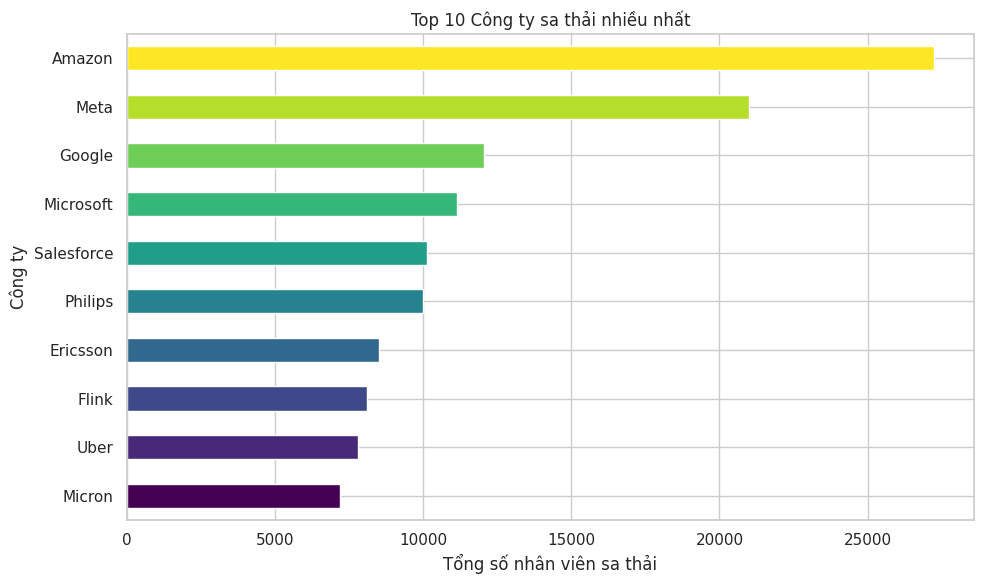

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Mảng màu gradient từ 'viridis' colormap
colors = plt.cm.viridis(np.linspace(0, 1, len(company_sorted)))

# Vẽ biểu đồ cột ngang với màu gradient
plt.figure(figsize=(10, 6))
company_sorted.sort_values().plot(kind='barh', color=colors)
plt.title('Top 10 Công ty sa thải nhiều nhất')
plt.xlabel('Tổng số nhân viên sa thải')
plt.ylabel('Công ty')
plt.tight_layout()
plt.savefig('z.pdf', format='pdf')
plt.show()


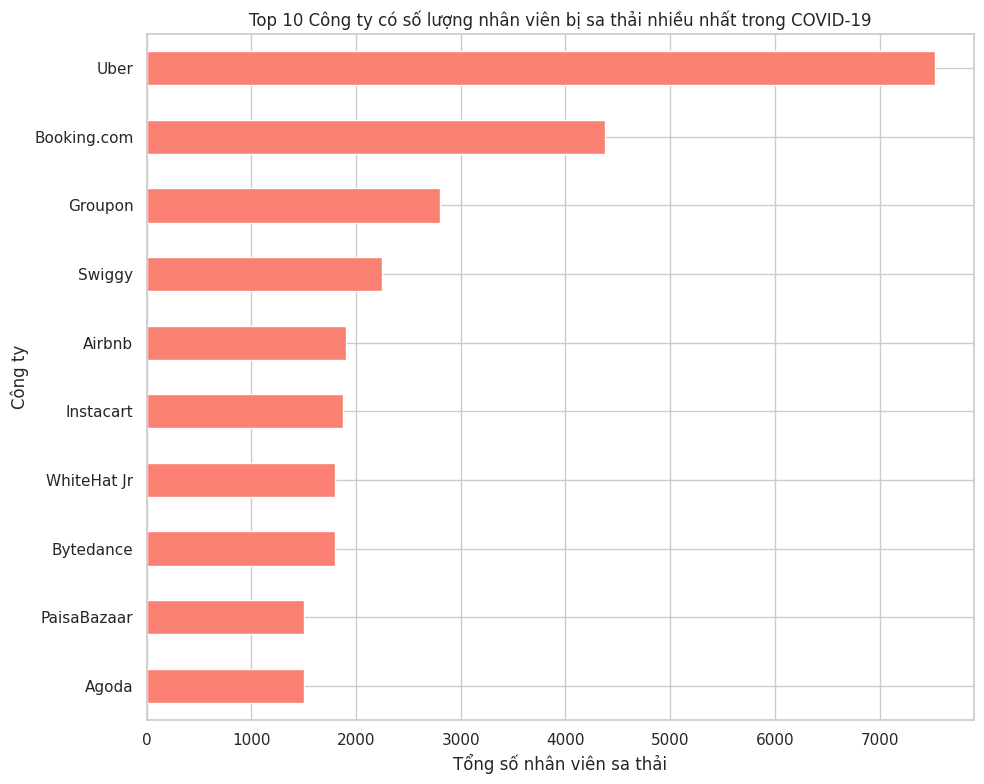

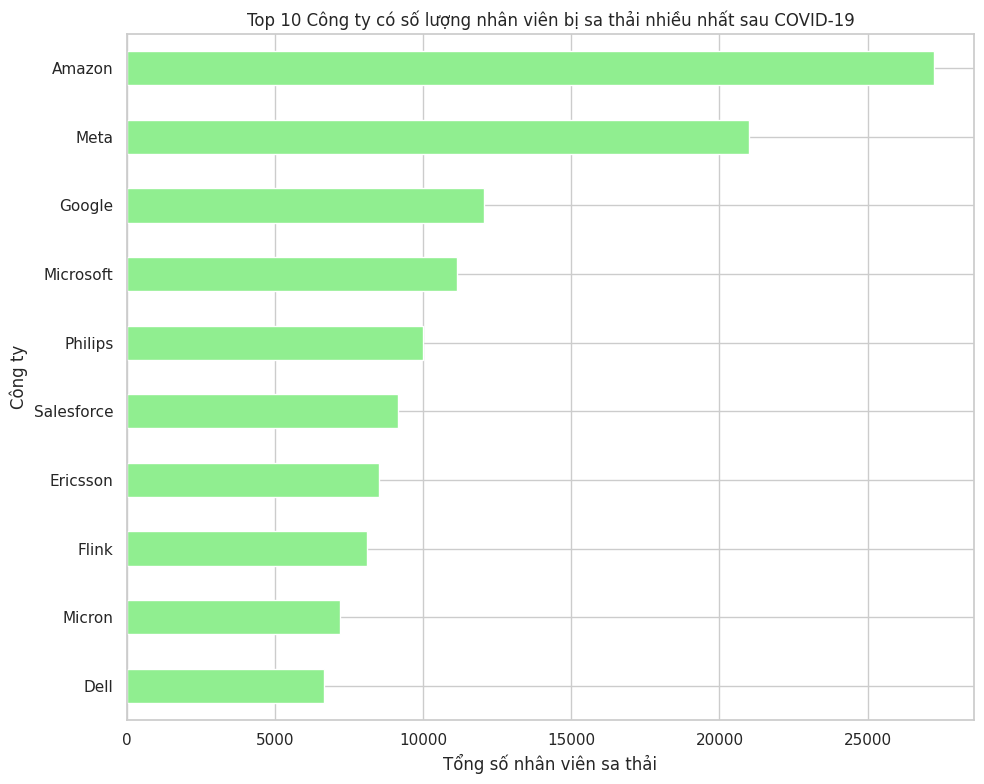

In [ ]:
# Nhóm dữ liệu theo tên công ty và tính tổng số nhân viên bị sa thải, sau đó lấy 10 công ty đầu tiên
top_companies_during = df_covid19.groupby('Company')['Total Laid Off'].sum().nlargest(10)
top_companies_after = df_after.groupby('Company')['Total Laid Off'].sum().nlargest(10)

# Tạo biểu đồ nhân viên bị sa thải trong giai đoạn COVID-19
plt.figure(figsize=(10, 8))
top_companies_during.sort_values().plot(kind='barh', color='salmon')
plt.title('Top 10 Công ty có số lượng nhân viên bị sa thải nhiều nhất trong COVID-19')
plt.xlabel('Tổng số nhân viên sa thải')
plt.ylabel('Công ty')
plt.tight_layout()
plt.show()

# Tạo biểu đồ nhân viên bị sa thải sau giai đoạn COVID-19
plt.figure(figsize=(10, 8))
top_companies_after.sort_values().plot(kind='barh', color='lightgreen')
plt.title('Top 10 Công ty có số lượng nhân viên bị sa thải nhiều nhất sau COVID-19')
plt.xlabel('Tổng số nhân viên sa thải')
plt.ylabel('Công ty')
plt.tight_layout()
plt.show()

In [ ]:
correlation_coefficient = df['Total Laid Off'].corr(df['Funds Raised'])

# Printing the correlation coefficient
print(f'Hệ số tương quan = {correlation_coefficient}')

Hệ số tương quan = 0.09840946875368994


Hệ số tương quan gần với 0, cho thấy không có mối tương quan mạnh mẽ giữa số lượng người bị sa thải và số vốn đã gọi được.

 Điều này có thể có nghĩa là việc một công ty gọi được nhiều vốn không nhất thiết dẫn đến việc họ sa thải ít người hơn, hoặc ngược lại.

In [ ]:
# Tạo biểu đồ scatter
fig = px.scatter(df, x='Total Laid Off', y='Funds Raised', labels={'Total Laid Off': 'Số lượng nhân viên sa thải', 'Funds Raised': 'Số tiền huy động được (USD)'})

# Thiết lập kích thước biểu đồ
fig.update_layout(
    width=700,
    height=600
)

# Hiển thị biểu đồ
fig.show()

##Top 10 Quốc gia có số lượng sa thải nhiều nhất.

Đầu tiên ta sẽ biểu diễn lượng sa thải của mỗi quốc gia lên bản đồ

In [ ]:
import plotly.express as px
top_countries = df.groupby('Country')['Total Laid Off'].sum().reset_index()
# Create choropleth map
fig = px.choropleth(top_countries,
                    locations='Country',
                    locationmode="country names",
                    color="Total Laid Off",
                    hover_name="Country",
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title='Total Layoffs by Country')

fig.show()
plt.tight_layout()

<Figure size 640x480 with 0 Axes>

In [ ]:
top_countries = df.groupby('Country')['Total Laid Off'].sum().nlargest(10)
top_countries = top_countries.rename(index={'Total Laid Off': 'Số lượng'})
top_countries = top_countries.astype(int)
print(top_countries)

Country
United States     337904
India              45684
Netherlands        18055
Germany            17358
United Kingdom     13494
Sweden             11959
Brazil             11143
Canada              9823
Singapore           6995
China               6120
Name: Total Laid Off, dtype: int64


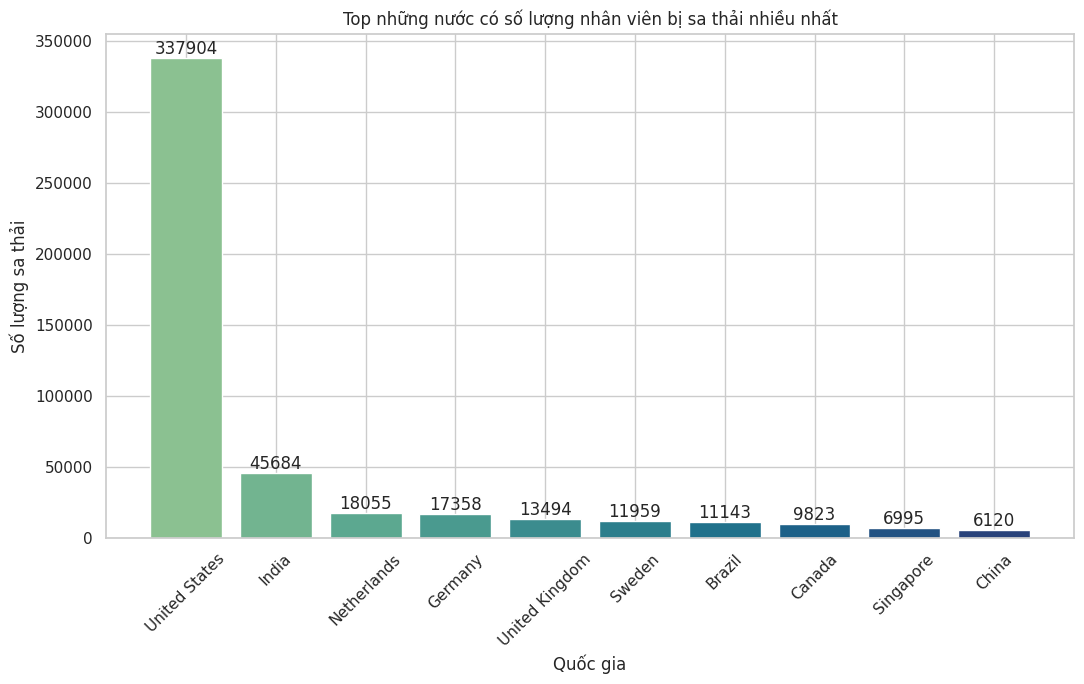

In [ ]:
colors = sns.color_palette('crest', len(top_countries))

# Vẽ biểu đồ cột với bảng màu
plt.figure(figsize=(11, 7))
bars = plt.bar(top_countries.index, top_countries.values,  width=0.8, color=colors)
plt.xlabel('Quốc gia')
plt.ylabel('Số lượng sa thải')
plt.title('Top những nước có số lượng nhân viên bị sa thải nhiều nhất')
plt.xticks(rotation=45)

# Hiển thị giá trị trên cột
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, yval, ha='center', va='bottom')

plt.tight_layout()
plt.show()


Có thể thấy Mĩ là quốc gia chịu tác động nặng nề từ trong làn sóng sa thải. Vậy nhưng khu vực nào có nhiều nhân viên bị sa thải nhất?

##Top 10 địa điểm sa thải nhiều nhất tại Hoa Kỳ

In [ ]:

# Lọc dữ liệu cho Mỹ
us_df = df[df['Country'] == 'United States']

# Nhóm theo khu vực và tính tổng số nhân viên bị sa thải
location_sum = us_df.groupby('Location')['Total Laid Off'].sum().nlargest(10).astype(int)

# Lấy khu vực có số nhân viên bị sa thải nhiều nhất
print("Khu vực có số nhân viên bị sa thải nhiều nhất tại Mỹ:")
print(location_sum)

Khu vực có số nhân viên bị sa thải nhiều nhất tại Mỹ:
Location
SF Bay Area      156176
Seattle           47115
New York City     32086
Boston            13569
Austin            11389
Chicago            8295
Los Angeles        8293
Boise              7275
Phoenix            5601
San Diego          4236
Name: Total Laid Off, dtype: int64


In [ ]:
# Convert 'location_sum' to a DataFrame with 'Location' and 'Total Laid Off' columns
location_sum_df = location_sum.reset_index()

# Vẽ biểu đồ pie chart
fig = px.pie(location_sum_df, names='Location', values='Total Laid Off',
             color_discrete_sequence=px.colors.sequential.Aggrnyl,
             title='Top 10 địa điểm tại Mỹ có tỷ lệ sa thải nhân viên cao nhất',
             width=800, height=600)
fig.update_traces(rotation=140)
plt.savefig('zz.pdf', format='pdf', bbox_inches='tight')
fig.show()


<Figure size 640x480 with 0 Axes>

##Tổng số lượng sa thải toàn cầu theo năm, tháng, mùa

In [ ]:
#Lọc ra số lượng sa thải mỗi năm
df_yearly_laidoff = df.groupby('Year')['Total Laid Off'].sum().reset_index()
df_yearly_laidoff = df_yearly_laidoff.rename(columns={'Total Laid Off': 'Laid Off Count'})

df_yearly_laidoff['Year'] = df_yearly_laidoff['Year'].astype(int)
df_yearly_laidoff['Laid Off Count'] = df_yearly_laidoff['Laid Off Count'].astype(int)
print(df_yearly_laidoff)

   Year  Laid Off Count
0  2020           80998
1  2021           15823
2  2022          163987
3  2023          245889


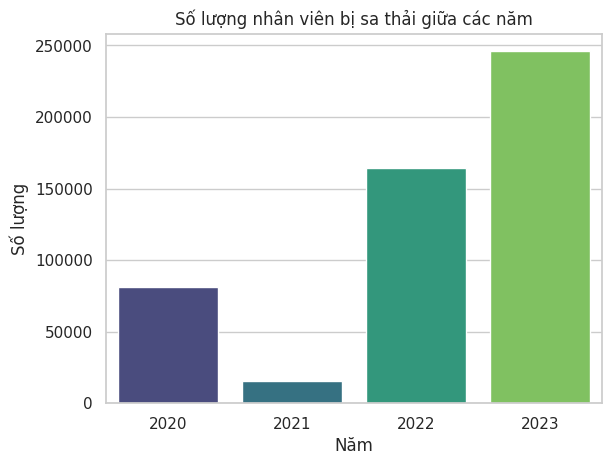

In [ ]:
ax = sns.barplot(x="Year",
                y="Laid Off Count",
                ci=0,  # Đặt giá trị trực tiếp
                estimator=sum,
                data=df_yearly_laidoff,
                palette=sns.color_palette("viridis", 4)
               )

ax.set(xlabel='Năm', ylabel='Số lượng',
       title="Số lượng nhân viên bị sa thải giữa các năm")

plt.show()




In [ ]:
#tính tỷ lệ sa thải giữa các năm
total_layoff_sum = df['Total Laid Off'].sum()
year_list = df['Year'].unique()
year_list

temp_list = []
for year in year_list:
    year_sum = df.loc[df['Year'] == year, 'Total Laid Off'].sum()
    percent = round((year_sum / total_layoff_sum) * 100, 2)
    yaxis_label = str(year) + " - " + str(percent) + " % "
    temp_list.append([year, year_sum, yaxis_label])

yearwise_df = pd.DataFrame(temp_list, columns=['Year', 'Total Laid Off', 'Tỷ lệ phần trăm'])
yearwise_df = yearwise_df.sort_values(by='Year')
yearwise_df = yearwise_df.dropna()
yearwise_df['Year'] = yearwise_df['Year'].astype(int)
yearwise_df['Total Laid Off'] = yearwise_df['Total Laid Off'].astype(int)
yearwise_df

Year  Total Laid Off  Tỷ lệ phần trăm
3  2020           80998  2020 - 15.99 % 
2  2021           15823   2021 - 3.12 % 
1  2022          163987  2022 - 32.36 % 
0  2023          245889  2023 - 48.53 %

In [ ]:
fig = px.pie(yearwise_df, values='Total Laid Off', names='Tỷ lệ phần trăm',
             color_discrete_map={'Tỷ lệ phần trăm': 'lightcoral'},
             title='Tỷ lệ sa thải nhân viên giữa các năm',
             width=800, height=600)
fig.update_traces(rotation=140)

fig.show()

In [ ]:
#Lọc ra số lượng sa thải mỗi tháng
df_monthly_laidoff = df.groupby('Month')['Total Laid Off'].sum().reset_index()
df_monthly_laidoff = df_monthly_laidoff.rename(columns={'Total Laid Off': 'Laid Off Count'})

df_monthly_laidoff['Month'] = df_monthly_laidoff['Month'].astype(int)
df_monthly_laidoff = df_monthly_laidoff.astype(int)
print(df_monthly_laidoff)

    Month  Laid Off Count
0       1           96587
1       2           44455
2       3           53212
3       4           51199
4       5           53903
5       6           38624
6       7           34080
7       8           27045
8       9           11248
9      10           28027
10     11           55901
11     12           12416


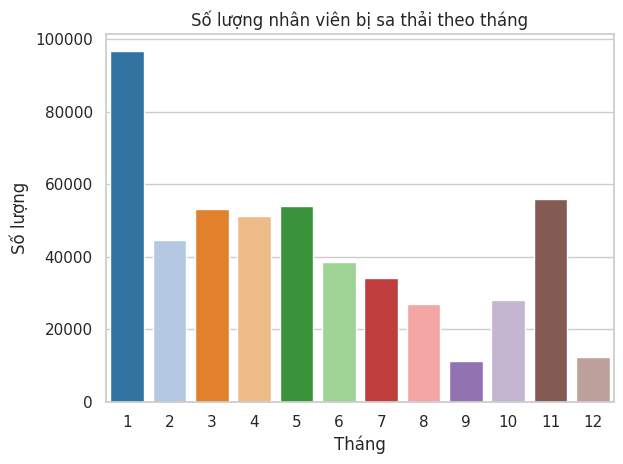

In [ ]:
ax = sns.barplot(x="Month",
                 y="Laid Off Count",
                 errorbar=('ci', 0),
                 data=df_monthly_laidoff,
                 estimator=sum,
                 palette=sns.color_palette("tab20", 12))

ax.set(xlabel='Tháng', ylabel='Số lượng',
       title="Số lượng nhân viên bị sa thải theo tháng")
plt.tight_layout()
plt.show()




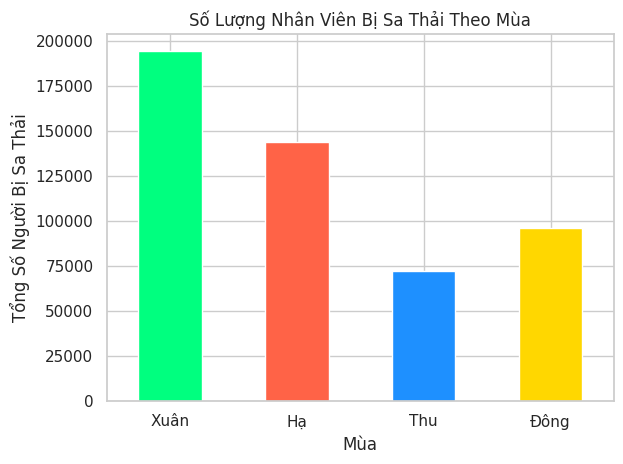

In [ ]:
# Tạo biến mới cho mùa theo khí hậu Việt Nam
df['Season_VN'] = df['Month'].apply(lambda x: 'Xuân' if x in [1, 2, 3] else ('Hạ' if x in [4, 5, 6] else ('Thu' if x in [7, 8, 9] else 'Đông')))

# Nhóm dữ liệu theo mùa và tính tổng số người bị sa thải
seasonal_layoffs_vn = df.groupby('Season_VN')['Total Laid Off'].sum().reindex(['Xuân', 'Hạ', 'Thu', 'Đông'])

# Vẽ biểu đồ cột với màu sắc tương phản
colors_vn = ['springgreen', 'tomato', 'dodgerblue', 'gold']
seasonal_layoffs_vn.plot(kind='bar', color=colors_vn)
plt.title('Số Lượng Nhân Viên Bị Sa Thải Theo Mùa')
plt.xlabel('Mùa')
plt.ylabel('Tổng Số Người Bị Sa Thải')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('mua.pdf', format='pdf')
plt.show()


In [ ]:
import plotly.graph_objects as go
layoff_covid19 = df_covid19['Total Laid Off'].sum().astype(int)
layoff_after = df_after['Total Laid Off'].sum().astype(int)

print("Số lượng nhân viên bị sa thải trong thời gian COVID-19:", layoff_covid19)
print("Số lượng nhân viên bị sa thải sau thời gian COVID-19:", layoff_after)
# Tạo biểu đồ cột
fig = go.Figure(data=[
    go.Bar(name='Trong COVID-19', x=['Trong COVID-19'], y=[layoff_covid19],  width=0.8),
    go.Bar(name='Sau COVID-19', x=['Sau COVID-19'], y=[layoff_after],  width=0.8)
])
# Cấu hình trục và tiêu đề
fig.update_layout(
    barmode='group',
    title='So sánh số lượng nhân viên bị sa thải trước và sau COVID-19',
    width=600,
    height=400
)
# Đặt tên cho trục số lượng (trục y)
fig.update_layout(
    yaxis=dict(
        title='Số lượng'
    )
)

# Hiển thị biểu đồ
fig.update_layout(
    showlegend=False
    )
fig.show()

Số lượng nhân viên bị sa thải trong thời gian COVID-19: 87811
Số lượng nhân viên bị sa thải sau thời gian COVID-19: 418886


##10 ngành công nghiệp có số lượng sa thải nhiều nhất

In [ ]:
#10 ngành công nghiệp có số lượng sa thải nhiều nhất
industries = df.groupby('Industry')['Total Laid Off'].sum().astype(int)
industries_sorted = industry.nlargest(10)

# In kết quả
print(industries_sorted)

Industry
Retail            60173
Consumer          58447
Other             44740
Transportation    39837
Food              39767
Finance           36251
Healthcare        33952
Hardware          27219
Travel            19510
Real Estate       18946
Name: Total Laid Off, dtype: int64


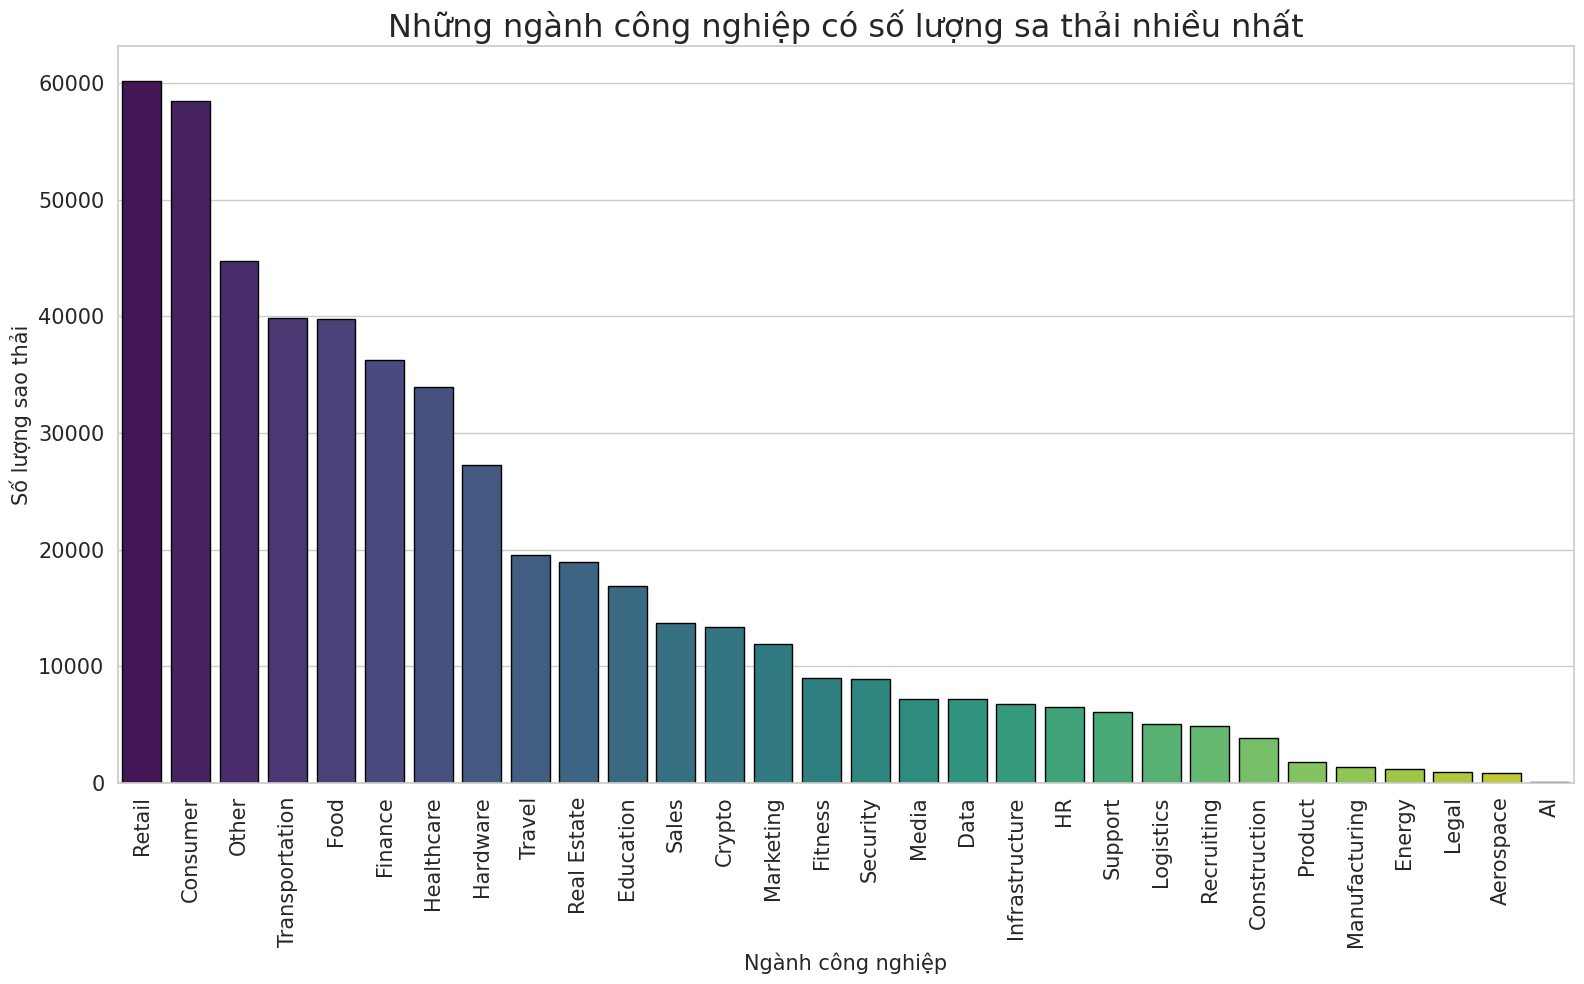

In [ ]:
plt.figure(figsize=(16,10))
sns.barplot(x='Industry', y='Total Laid Off', data=df.groupby('Industry').sum().sort_values('Total Laid Off', ascending=False).reset_index(), ci=None, palette=sns.color_palette("viridis",30),linewidth=1,edgecolor='black')
plt.xticks(fontsize=15, rotation=90)
plt.yticks(fontsize=15)
plt.xlabel(xlabel='Ngành công nghiệp', fontsize=15)
plt.ylabel(ylabel='Số lượng sao thải', fontsize=15)
plt.title('Những ngành công nghiệp có số lượng sa thải nhiều nhất', fontsize=23)
plt.tight_layout()
plt.show()


##Công ty nào có số lần sa thải nhiều nhất

In [ ]:
top_companies = df['Company'].value_counts().head(10).rename_axis('Company').reset_index(name='Số lần sa thải')
print(top_companies)

      Company  Số lần sa thải
0        Loft               6
1        Uber               6
2     Shopify               5
3      Gopuff               5
4  Salesforce               5
5      Swiggy               5
6       Blend               5
7      Amazon               5
8  Stitch Fix               4
9     Patreon               4


In [ ]:
# In thông tin công ty và ngành công nghiệp của những công ty có số lần sa thải nhiều nhất
merged_df = pd.merge(top_companies, df[['Company', 'Industry']], on='Company', how='left').drop_duplicates(subset=['Company'])

# Đặt lại chỉ số theo thứ tự tăng dần
merged_df = merged_df.reset_index(drop=True)
print(merged_df)

      Company  Số lần sa thải        Industry
0        Loft               6     Real Estate
1        Uber               6  Transportation
2     Shopify               5          Retail
3      Gopuff               5            Food
4  Salesforce               5           Sales
5      Swiggy               5            Food
6       Blend               5         Finance
7      Amazon               5          Retail
8  Stitch Fix               4          Retail
9     Patreon               4           Media


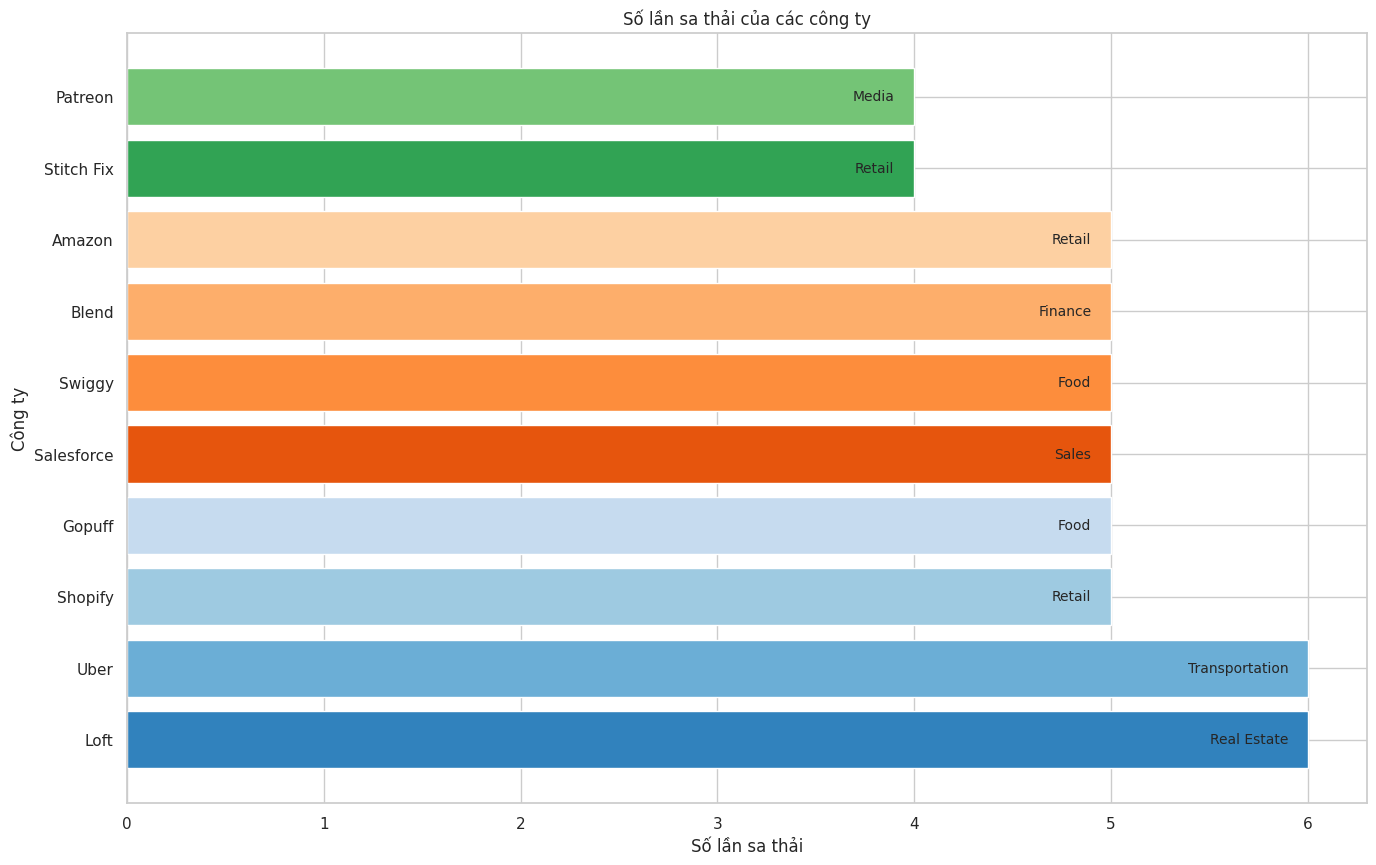

In [ ]:
plt.figure(figsize=(16, 10))

# Vẽ biểu đồ cột nằm ngang
colors = sns.color_palette("tab20c", 10)
plt.barh(merged_df['Company'], merged_df['Số lần sa thải'], color=colors)
plt.xlabel('Số lần sa thải')
plt.ylabel('Công ty')
plt.title('Số lần sa thải của các công ty')

# Hiển thị thông tin ngành công nghiệp bên phải cột với font size nhỏ hơn
for i, value in enumerate(merged_df['Industry']):
    plt.text(merged_df['Số lần sa thải'][i] - 0.1, i, value, ha='right', va='center', fontsize=10)

# Hiển thị biểu đồ
plt.show()


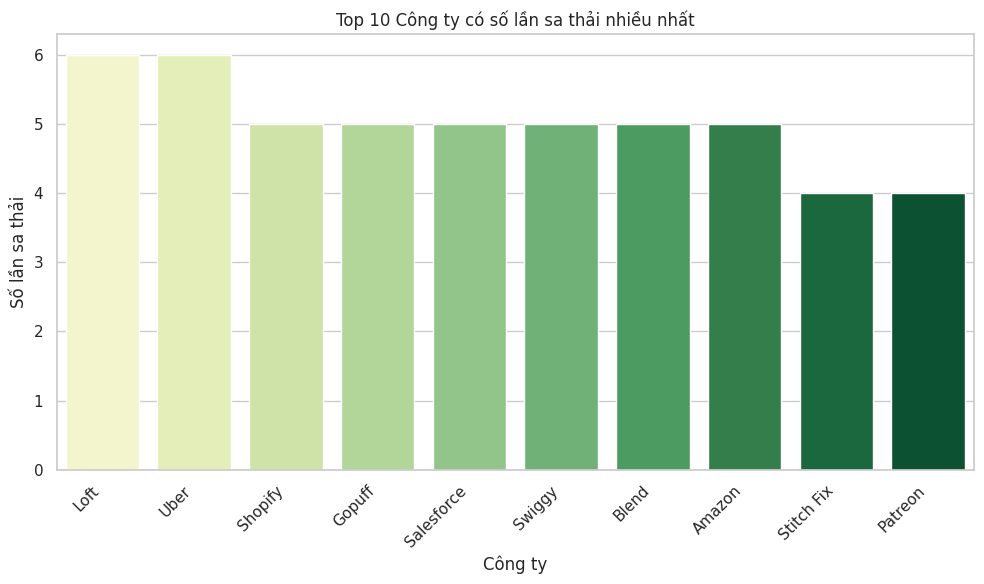

In [ ]:
top_company = df['Company'].value_counts().head(10).rename_axis('Công ty').reset_index(name='Số lần sa thải')
# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
sns.barplot(x='Công ty', y='Số lần sa thải', data=top_company, palette='YlGn')
plt.title('Top 10 Công ty có số lần sa thải nhiều nhất')
plt.xlabel('Công ty')
plt.ylabel('Số lần sa thải')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.savefig('solan.pdf', format='pdf')
plt.show()

## Công ty ở giai đoạn tài chính (stage) nào có số lượng sa thải nhiều nhất


In [ ]:
layoffs_by_stage = df.groupby('Stage')['Total Laid Off'].sum().reset_index()

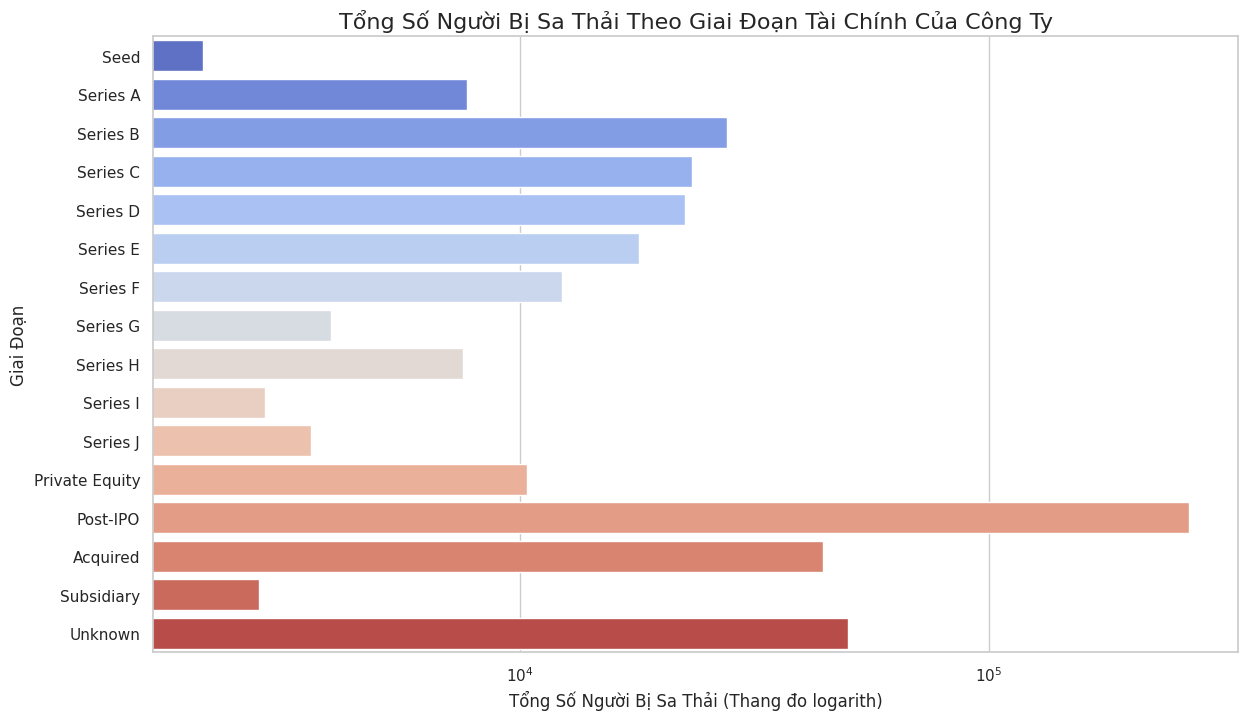

In [ ]:
# Nhóm dữ liệu theo 'Stage' và tính tổng 'Total Laid Off' cho mỗi nhóm
layoffs_by_stage = df.groupby('Stage')['Total Laid Off'].sum().reset_index()

# Sắp xếp dữ liệu để tìm ra giai đoạn có số lượng sa thải nhiều nhất
layoffs_by_stage_sorted = layoffs_by_stage.sort_values(by='Total Laid Off', ascending=False)

# Thiết lập phong cách thẩm mỹ cho các biểu đồ
sns.set_style("whitegrid")

# Tạo biểu đồ
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='Total Laid Off', y='Stage', data=layoffs_by_stage_sorted,
                 palette=sns.color_palette("coolwarm", len(layoffs_by_stage_sorted)))

# Đặt tiêu đề và nhãn cho biểu đồ
ax.set_title('Tổng Số Người Bị Sa Thải Theo Giai Đoạn Tài Chính Của Công Ty', fontsize=16)
ax.set_xlabel('Tổng Số Người Bị Sa Thải (Thang đo logarith)', fontsize=12)
ax.set_ylabel('Giai Đoạn', fontsize=12)

# Áp dụng log scale cho trục x để dễ nhìn hơn
plt.xscale('log')

# Hiển thị biểu đồ
plt.show()

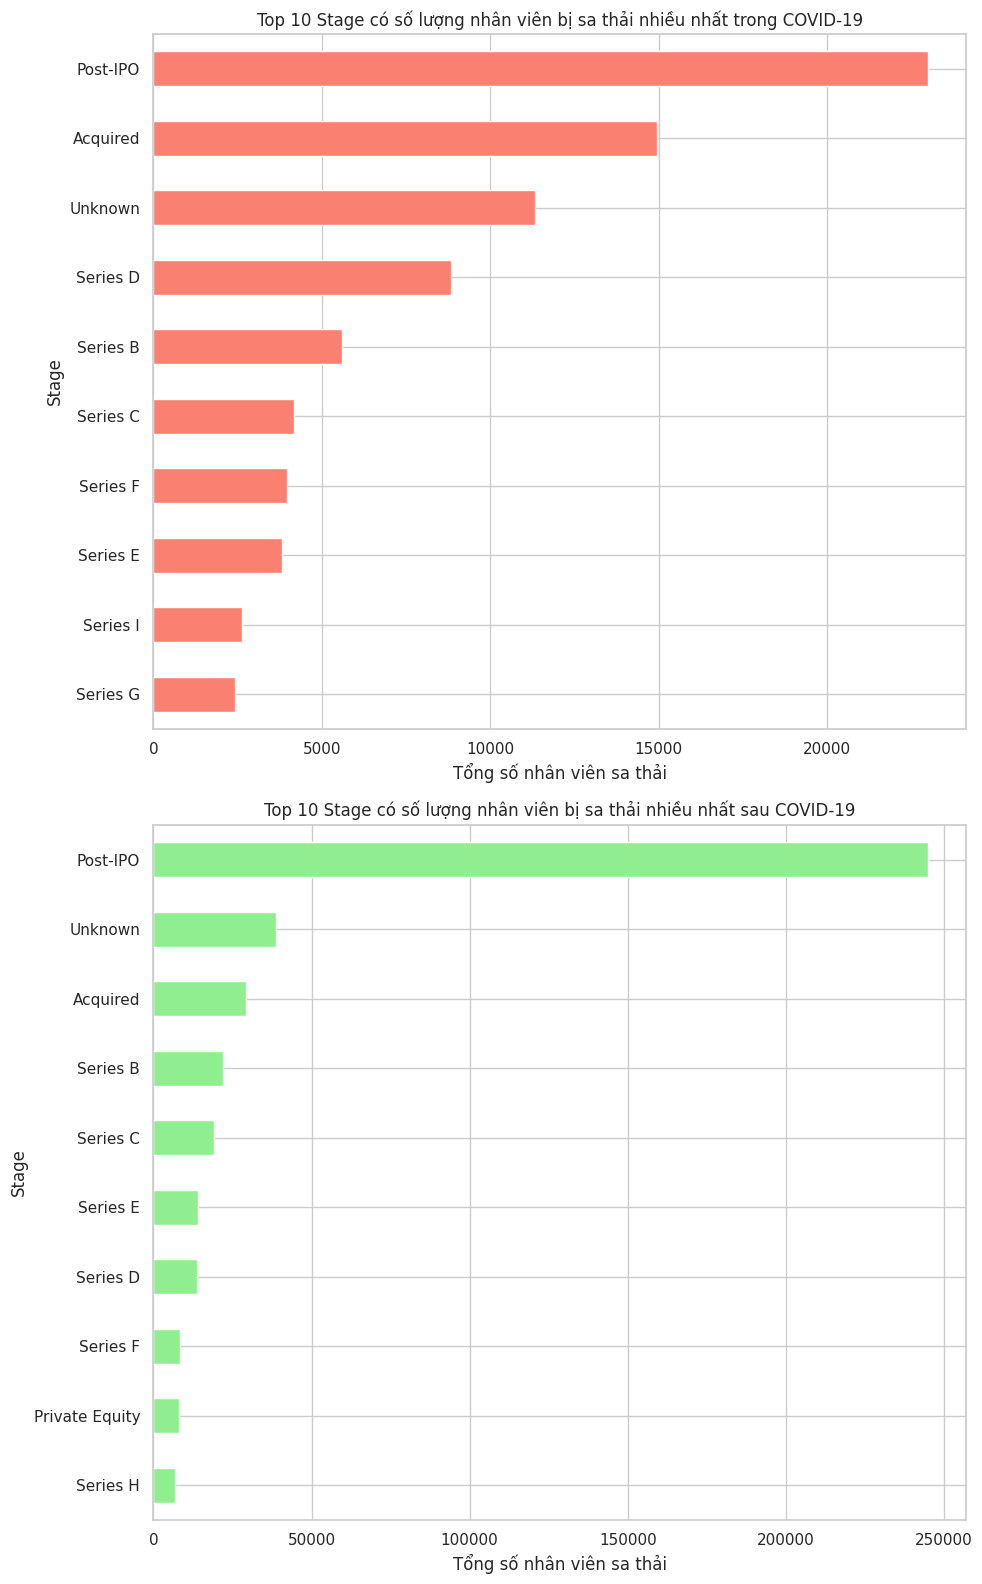

In [ ]:
# Nhóm dữ liệu theo tên công ty và tính tổng số nhân viên bị sa thải, sau đó lấy 10 công ty đầu tiên
top_companies_during = df_covid19.groupby('Stage')['Total Laid Off'].sum().nlargest(10)
top_stage_after = df_after.groupby('Stage')['Total Laid Off'].sum().nlargest(10)

# Tạo hai biểu đồ đặt cạnh nhau để thuận tiện cho việc so sánh
fig, axes = plt.subplots(2, 1, figsize=(10, 16))  # Hai biểu đồ dựng đứng

# Biểu đồ cho giai đoạn trong COVID-19
top_companies_during.sort_values().plot(kind='barh', ax=axes[0], color='salmon')
axes[0].set_title('Top 10 Stage có số lượng nhân viên bị sa thải nhiều nhất trong COVID-19')
axes[0].set_xlabel('Tổng số nhân viên sa thải')
axes[0].set_ylabel('Stage')

# Biểu đồ cho giai đoạn sau COVID-19
top_stage_after.sort_values().plot(kind='barh', ax=axes[1], color='lightgreen')
axes[1].set_title('Top 10 Stage có số lượng nhân viên bị sa thải nhiều nhất sau COVID-19')
axes[1].set_xlabel('Tổng số nhân viên sa thải')
axes[1].set_ylabel('Stage')

plt.tight_layout()
plt.show()


#KIỂM ĐỊNH GIẢ THUYẾT

# New Section

In [ ]:
kd_df = df.copy()

In [ ]:
kd_df.columns

Index(['Company', 'Location', 'Industry', 'Total Laid Off',
       'Percentage Laid Off', 'Date', 'Stage', 'Country', 'Funds Raised',
       'Month', 'Day', 'Year', 'Season_VN'],
      dtype='object')

In [ ]:
kd_df.isnull().sum()

Company                  0
Location                 0
Industry                 0
Total Laid Off           0
Percentage Laid Off    595
Date                     0
Stage                    0
Country                  0
Funds Raised           194
Month                    0
Day                      0
Year                     0
Season_VN                0
dtype: int64

In [ ]:
kd_df = kd_df.dropna()

In [ ]:
kd_df = kd_df.reset_index(drop=True)

In [ ]:
kd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1356 entries, 0 to 1355
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Company              1356 non-null   object        
 1   Location             1356 non-null   object        
 2   Industry             1356 non-null   object        
 3   Total Laid Off       1356 non-null   int64         
 4   Percentage Laid Off  1356 non-null   float64       
 5   Date                 1356 non-null   datetime64[ns]
 6   Stage                1356 non-null   category      
 7   Country              1356 non-null   object        
 8   Funds Raised         1356 non-null   float64       
 9   Month                1356 non-null   int64         
 10  Day                  1356 non-null   int64         
 11  Year                 1356 non-null   int64         
 12  Season_VN            1356 non-null   object        
dtypes: category(1), datetime64[ns](1)

###Kiểm định độ dốc của chuỗi thời gian- Augmented Dickey-Fuller (ADF)

# New Section

Sử dụng kiểm định Augmented Dickey-Fuller để kiểm tra tính chất độ dốc của chuỗi thời gian trong cột "Total Laid Off".

In [ ]:
kd_df['Month_Year'] = pd.to_datetime(kd_df['Date']).dt.strftime('%Y-%m')

In [ ]:
kd_df['Month_Year']

0       2023-10
1       2023-10
2       2023-10
3       2023-10
4       2023-10
         ...   
1351    2020-03
1352    2020-03
1353    2020-03
1354    2020-03
1355    2020-03
Name: Month_Year, Length: 1356, dtype: object

In [ ]:
kd_df = kd_df.groupby('Month_Year')['Total Laid Off'].sum().reset_index()

In [ ]:
kd_df = kd_df.reset_index(drop=True)
kd_df.index = kd_df.index + 1

In [ ]:
kd_df = kd_df.drop(columns=['Month_Year'])

In [ ]:
kd_df

Total Laid Off
1             7241
2            21064
3            21404
4             6442
5             2198
6             1853
7              339
8              110
9              189
10             120
11             516
12             332
13             160
14            2434
15              37
16              41
17            2070
18             900
19              80
20            3385
21            4514
22            2581
23           11535
24           13611
25           10097
26           10487
27            3893
28           10541
29           49556
30            6182
31           66174
32           26000
33           10338
34           14681
35            9242
36            5532
37            4227
38            7348
39            2585
40            3826

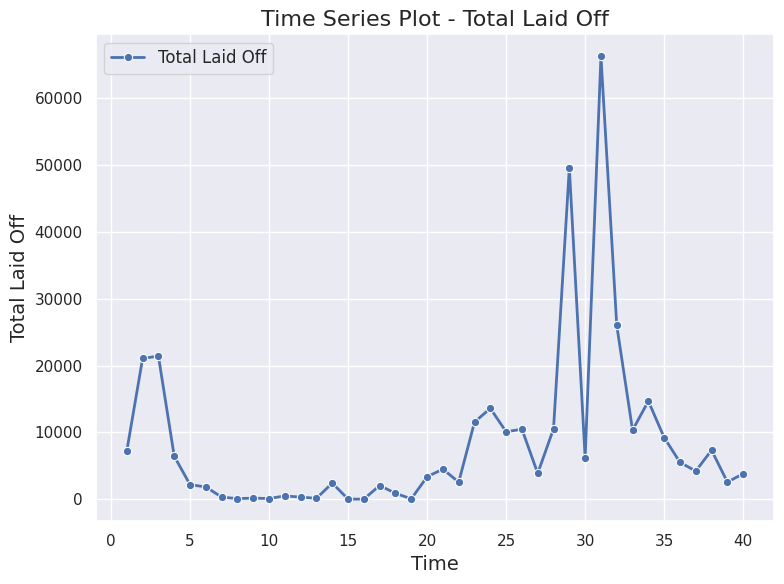

In [ ]:
sns.set(style="darkgrid")
data = kd_df['Total Laid Off'].tolist()
# Create a time series plot with seaborn
plt.figure(figsize=(8, 6))
sns.lineplot(x=range(1, len(data) + 1), y=data, marker='o', color='b', label='Total Laid Off', linewidth=2)

plt.title('Time Series Plot - Total Laid Off', fontsize=16)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Total Laid Off', fontsize=14)
plt.legend(fontsize=12)

plt.tight_layout()
plt.savefig('timeseries.pdf', format='pdf')
plt.show()

In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

time_series_data = kd_df['Total Laid Off']
result = adfuller(time_series_data)

# Print the results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

if result[1] <= 0.05:
    print("Reject the null hypothesis. The time series is likely stationary.")
else:
    print("Fail to reject the null hypothesis. The time series may not be stationary.")


ADF Statistic: -2.277613268185804
p-value: 0.1792898128446469
Critical Values: {'1%': -3.6155091011809297, '5%': -2.941262357486514, '10%': -2.6091995013850418}
Fail to reject the null hypothesis. The time series may not be stationary.


#MACHINE LEARNING

##Xử lí dữ liệu trước khi thực hiện machine learning

In [ ]:
machine_df = df.copy()

In [ ]:
machine_df = machine_df[['Industry','Total Laid Off','Percentage Laid Off','Stage','Country','Funds Raised']]

In [ ]:
machine_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2090 entries, 0 to 2090
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Industry             2090 non-null   object  
 1   Total Laid Off       2090 non-null   int64   
 2   Percentage Laid Off  1495 non-null   float64 
 3   Stage                2090 non-null   category
 4   Country              2090 non-null   object  
 5   Funds Raised         1896 non-null   float64 
dtypes: category(1), float64(2), int64(1), object(2)
memory usage: 100.7+ KB


In [ ]:
machine_df.isnull().sum()

Industry                 0
Total Laid Off           0
Percentage Laid Off    595
Stage                    0
Country                  0
Funds Raised           194
dtype: int64

In [ ]:
machine_df = machine_df.dropna()

In [ ]:
machine_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1356 entries, 0 to 2089
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Industry             1356 non-null   object  
 1   Total Laid Off       1356 non-null   int64   
 2   Percentage Laid Off  1356 non-null   float64 
 3   Stage                1356 non-null   category
 4   Country              1356 non-null   object  
 5   Funds Raised         1356 non-null   float64 
dtypes: category(1), float64(2), int64(1), object(2)
memory usage: 65.6+ KB


In [ ]:
#machine_df.to_csv("train_classify.csv")

In [ ]:
machine_df = machine_df.reset_index(drop=True)

In [ ]:
machine_df.head(5)

Industry  Total Laid Off  Percentage Laid Off     Stage        Country  \
0     Finance             120                 0.20  Post-IPO  United States   
1    Hardware             130                 0.20  Series F  United States   
2  Healthcare             119                 0.17   Unknown  United States   
3   Logistics             500                 1.00  Series E  United States   
4       Sales             140                 0.09  Acquired  United States   

   Funds Raised  
0        1300.0  
1         365.0  
2         218.0  
3        1100.0  
4          32.0

In [ ]:
#machine_df_test = machine_df.copy()

In [ ]:
exclude = ['Industry', 'Stage', 'Country']
count_outliers = 0

for col in machine_df.columns:
    if col not in exclude:
        outliers, z_scores = check_outliers(machine_df[col])
        if len(outliers) > 0:
            count_outliers += len(outliers)
            print(f'Có {len(outliers)} outliers trong cột {col}')
        else:
            print(f'Không có outliers trong cột {col}')

print(f'Có tổng cộng {count_outliers} outliers trong bộ dữ liệu')


Có 17 outliers trong cột Total Laid Off
Có 51 outliers trong cột Percentage Laid Off
Có 9 outliers trong cột Funds Raised
Có tổng cộng 77 outliers trong bộ dữ liệu


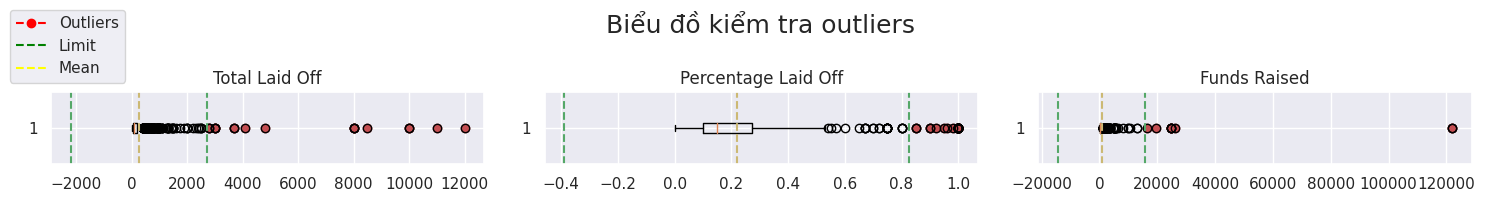

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15, 2))
fig.suptitle('Biểu đồ kiểm tra outliers', fontsize=18)

selected_col = []
for col in machine_df.columns:
    if col not in exclude:
        selected_col.append(col)

for i, col in enumerate(selected_col):
    draw_outliers(machine_df[col], axs[i])
    axs[i].set_title(col)

# Tạo chú thích
red_dot = mlines.Line2D([], [], color='red', marker='o', linestyle='--', label='Outliers')
green_line = mlines.Line2D([], [], color='green', linestyle='--', label='Limit')
yellow_line = mlines.Line2D([], [], color='yellow', linestyle='--', label='Mean')
fig.legend(handles=[red_dot, green_line, yellow_line], loc='upper left', bbox_to_anchor=(0, 1), borderaxespad=0.)

plt.tight_layout()
plt.savefig('outliersmachine.pdf', format='pdf')
plt.show()

In [ ]:
def remove_outliers(df, exclude=None, z_threshold=3):
    if exclude is None:
        exclude = []
    rows_to_remove = set()
    for col in df.columns:
        if col not in exclude:
            outliers, _ = check_outliers(df[col])
            outlier_indices = df.index[df[col].isin(outliers)].tolist()
            rows_to_remove.update(outlier_indices)
    #print(rows_to_remove)
    df = df.drop(list(rows_to_remove))
    return df

In [ ]:
outliers, _ = check_outliers(df[col])
exclude = ['Industry', 'Stage', 'Country']
while len(outliers) > 0:
    machine_df = remove_outliers(machine_df, exclude=exclude)
    outliers, _ = check_outliers(machine_df[col])

In [ ]:
machine_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 924 entries, 1 to 1355
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Industry             924 non-null    object  
 1   Total Laid Off       924 non-null    int64   
 2   Percentage Laid Off  924 non-null    float64 
 3   Stage                924 non-null    category
 4   Country              924 non-null    object  
 5   Funds Raised         924 non-null    float64 
dtypes: category(1), float64(2), int64(1), object(2)
memory usage: 44.9+ KB


In [ ]:
exclude = ['Industry', 'Stage', 'Country']
count_outliers = 0

for col in machine_df.columns:
    if col not in exclude:
        outliers, z_scores = check_outliers(machine_df[col])
        if len(outliers) > 0:
            count_outliers += len(outliers)
            print(f'Có {len(outliers)} outliers trong cột {col}')
        else:
            print(f'Không có outliers trong cột {col}')

print(f'Có tổng cộng {count_outliers} outliers trong bộ dữ liệu')


Không có outliers trong cột Total Laid Off
Không có outliers trong cột Percentage Laid Off
Không có outliers trong cột Funds Raised
Có tổng cộng 0 outliers trong bộ dữ liệu


In [ ]:
machine_df.to_csv("machine.csv")

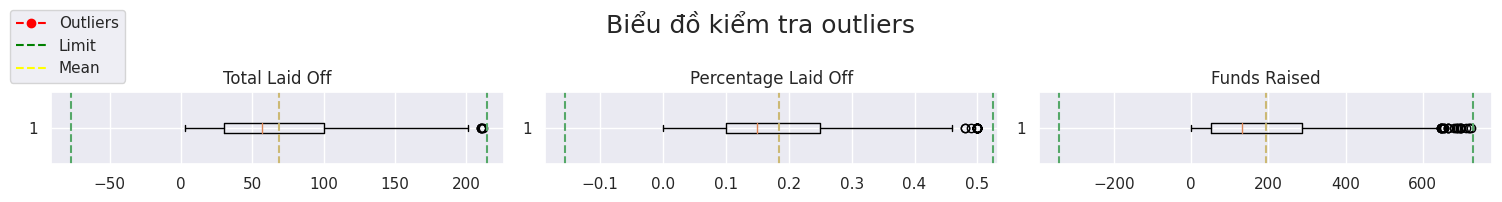

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15, 2))
fig.suptitle('Biểu đồ kiểm tra outliers', fontsize=18)

selected_col = []
for col in machine_df.columns:
    if col not in exclude:
        selected_col.append(col)
for i, col in enumerate(selected_col):
    draw_outliers(machine_df[col], axs[i])
    axs[i].set_title(col)

# Tạo chú thích
red_dot = mlines.Line2D([], [], color='red', marker='o', linestyle='--', label='Outliers')
green_line = mlines.Line2D([], [], color='green', linestyle='--', label='Limit')
yellow_line = mlines.Line2D([], [], color='yellow', linestyle='--', label='Mean')
fig.legend(handles=[red_dot, green_line, yellow_line], loc='upper left', bbox_to_anchor=(0, 1), borderaxespad=0.)

plt.tight_layout()
plt.savefig('outliersmachine0.pdf', format='pdf')
plt.show()

In [ ]:
machine_df['Stage'].unique()

['Series F', 'Unknown', 'Acquired', 'Series A', 'Series H', ..., 'Series C', 'Series E', 'Seed', 'Series G', 'Series I']
Length: 14
Categories (16, object): ['Seed' < 'Series A' < 'Series B' < 'Series C' ... 'Post-IPO' <
                          'Acquired' < 'Subsidiary' < 'Unknown']

In [ ]:
#machine_df = machine_df[machine_df['Stage'] != 'Unknown']

In [ ]:
# Kiểm tra xem có giá trị 'Unknown' trong cột 'Stage' hay không
# unknown_in_stage = 'Unknown' in machine_df['Stage'].unique()
# print(f"'Unknown' in 'Stage' column: {unknown_in_stage}")


In [ ]:
machine_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 924 entries, 1 to 1355
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Industry             924 non-null    object  
 1   Total Laid Off       924 non-null    int64   
 2   Percentage Laid Off  924 non-null    float64 
 3   Stage                924 non-null    category
 4   Country              924 non-null    object  
 5   Funds Raised         924 non-null    float64 
dtypes: category(1), float64(2), int64(1), object(2)
memory usage: 44.9+ KB


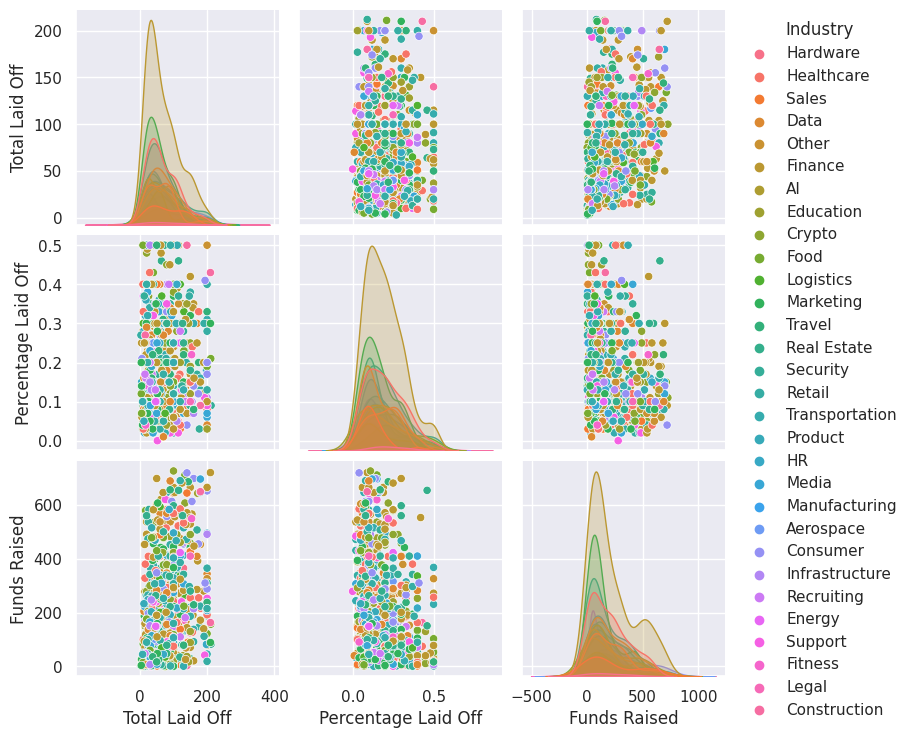

In [ ]:
sns.set_theme(style = "darkgrid")
sns.pairplot(machine_df, hue ="Industry")
plt.savefig('trucquan1.pdf', format='pdf')

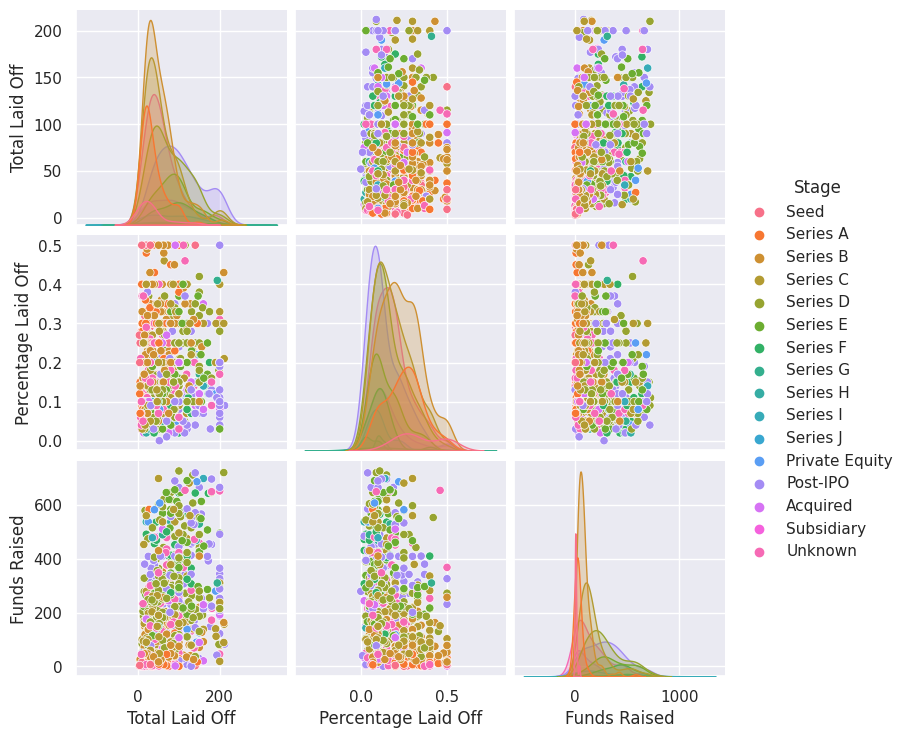

In [ ]:
sns.set_theme(style = "darkgrid")
sns.pairplot(machine_df, hue = "Stage")
plt.savefig('trucquan2.pdf', format='pdf')

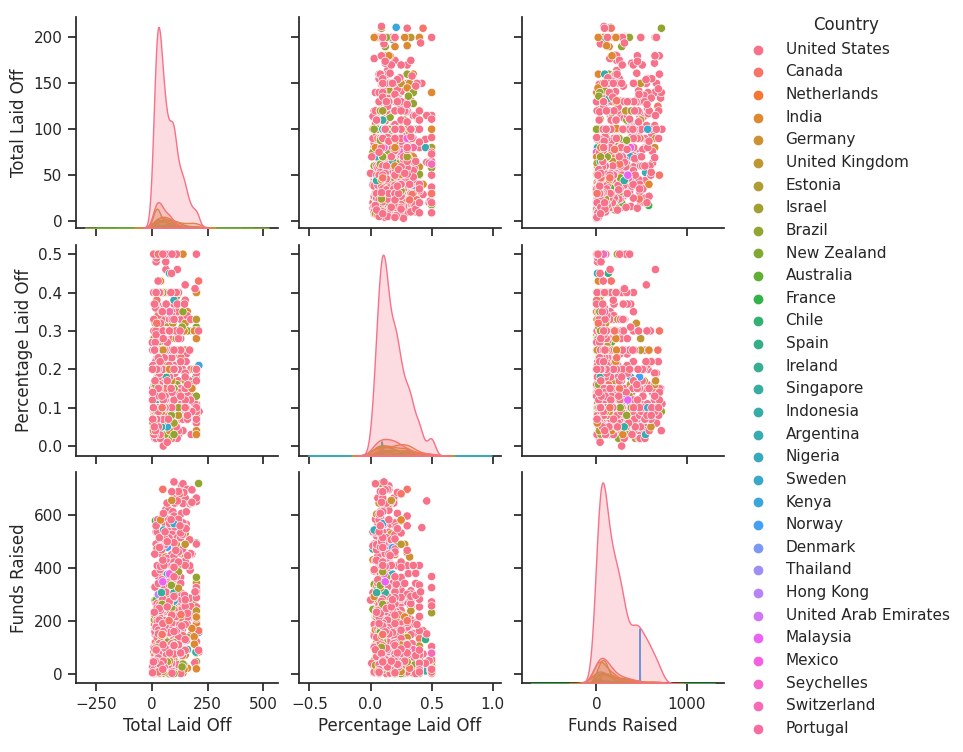

In [ ]:
sns.set_theme(style = "ticks")
sns.pairplot(machine_df, hue = "Country")
plt.savefig('trucquan3.pdf', format='pdf')

In [ ]:
machine_df_test = machine_df.copy()

##Encode dữ liệu


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
machine_df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 924 entries, 1 to 1355
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Industry             924 non-null    object  
 1   Total Laid Off       924 non-null    int64   
 2   Percentage Laid Off  924 non-null    float64 
 3   Stage                924 non-null    category
 4   Country              924 non-null    object  
 5   Funds Raised         924 non-null    float64 
dtypes: category(1), float64(2), int64(1), object(2)
memory usage: 77.2+ KB


In [ ]:
machine_df_clus = machine_df_test.copy()

In [ ]:
#Mã hóa dữ liệu
label_encoder = LabelEncoder()
machine_df_test['Industry'] = label_encoder.fit_transform(machine_df_test['Industry'])
machine_df_test['Stage'] = label_encoder.fit_transform(machine_df_test['Stage'])
machine_df_test['Country'] = label_encoder.fit_transform(machine_df_test['Country'])

In [ ]:
y = machine_df_test['Country']
X = machine_df_test.drop("Country", axis =1)

print(X)
print(y)

      Industry  Total Laid Off  Percentage Laid Off  Stage  Funds Raised
1           12             130                 0.20      9         365.0
2           13             119                 0.17     13         218.0
4           25             140                 0.09      0          32.0
5            5              21                 0.28      4          16.0
7           20              35                 0.10      4          64.0
...        ...             ...                  ...    ...           ...
1349        29              50                 0.50      5          17.0
1350        18               4                 0.20      3           4.0
1351        29             130                 0.22      6          79.0
1353        28               8                 0.10     13          45.0
1355        24              20                 0.40      6          90.0

[924 rows x 5 columns]
1       30
2       30
4       30
5        3
7       17
        ..
1349    30
1350    30
1351    30
1

In [ ]:
machine_df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 924 entries, 1 to 1355
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Industry             924 non-null    int64  
 1   Total Laid Off       924 non-null    int64  
 2   Percentage Laid Off  924 non-null    float64
 3   Stage                924 non-null    int64  
 4   Country              924 non-null    int64  
 5   Funds Raised         924 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 82.8 KB


#Dự đoán Country dựa trên ['Industry','Total Laid Off','Percentage Laid Off','Stage','Funds Raised']

##Decision Tree

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(739, 5)
(185, 5)
(739,)
(185,)


In [ ]:
print(X_train.dtypes)


Industry                 int64
Total Laid Off           int64
Percentage Laid Off    float64
Stage                    int64
Funds Raised           float64
dtype: object


In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = dt.predict(X_test)

In [ ]:
print(y_pred.shape)

(185,)


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Chọn 'weighted' cho bài toán đa lớp
recall = recall_score(y_test, y_pred, average='weighted')  # Chọn 'weighted' cho bài toán đa lớp
f1 = f1_score(y_test, y_pred, average='weighted')  # Chọn 'weighted' cho bài toán đa lớp

# In kết quả
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')

Accuracy: 0.43783783783783786
Precision: 0.47007917007917005
Recall: 0.43783783783783786
F1-score: 0.4525460242851547


##BaggingClassifier

In [ ]:
bag = BaggingClassifier(n_estimators=100)
bag.fit(X_train, y_train)

BaggingClassifier(n_estimators=100)

In [ ]:
y_pred_bag = bag.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred_bag)
precision = precision_score(y_test, y_pred_bag, average='weighted')  # Chọn 'weighted' cho bài toán đa lớp
recall = recall_score(y_test, y_pred_bag, average='weighted')  # Chọn 'weighted' cho bài toán đa lớp
f1 = f1_score(y_test, y_pred_bag, average='weighted')  # Chọn 'weighted' cho bài toán đa lớp

# In kết quả
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')

Accuracy: 0.6216216216216216
Precision: 0.4679870059388132
Recall: 0.6216216216216216
F1-score: 0.5305349305349305


##RandomForestClassifier()

In [ ]:
rand = RandomForestClassifier()
rand.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred_rand = rand.predict(X_test)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [ ]:
accuracy = accuracy_score(y_test, y_pred_rand)
precision = precision_score(y_test, y_pred_rand, average='weighted')  # Chọn 'weighted' cho bài toán đa lớp
recall = recall_score(y_test, y_pred_rand, average='weighted')  # Chọn 'weighted' cho bài toán đa lớp
f1 = f1_score(y_test, y_pred_rand, average='weighted')  # Chọn 'weighted' cho bài toán đa lớp

# In kết quả
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')

Accuracy: 0.6216216216216216
Precision: 0.45361883438806516
Recall: 0.6216216216216216
F1-score: 0.5219780333967186


#Lựa chọn giải pháp

#Phân cụm công ty Tech

In [ ]:
#-Đầu tiên ta sẽ gán nhãn thuộc tính country thành USA (United States of America) và non-USA (các quốc gia khác):
usa_countries = ['United States']
# Tạo điều kiện cho mỗi nhóm
conditions = [
    machine_df_clus['Country'].isin(usa_countries),
]

# Đặt nhãn cho mỗi điều kiện tương ứng
labels = ['US']
# Sử dụng np.select để gán nhãn
machine_df_clus['Country'] = np.select(conditions, labels, default='Others')

In [ ]:
#Mã hóa dữ liệu
label_encoder = LabelEncoder()
machine_df_clus['Industry'] = label_encoder.fit_transform(machine_df_clus['Industry'])
machine_df_clus['Stage'] = label_encoder.fit_transform(machine_df_clus['Stage'])
machine_df_clus['Country'] = label_encoder.fit_transform(machine_df_clus['Country'])

In [ ]:
machine_df_clus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 924 entries, 1 to 1355
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Industry             924 non-null    int64  
 1   Total Laid Off       924 non-null    int64  
 2   Percentage Laid Off  924 non-null    float64
 3   Stage                924 non-null    int64  
 4   Country              924 non-null    int64  
 5   Funds Raised         924 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 82.8 KB


##HAC

In [ ]:
## Thư viện
import joblib             as jlb
import matplotlib.pyplot  as plt
import numpy              as np
import pandas             as pd
import seaborn            as sbn
import warnings
warnings.filterwarnings('ignore') # tắt những cảnh báo

from collections          import Counter
from scipy.cluster        import hierarchy
from sklearn.cluster      import AgglomerativeClustering

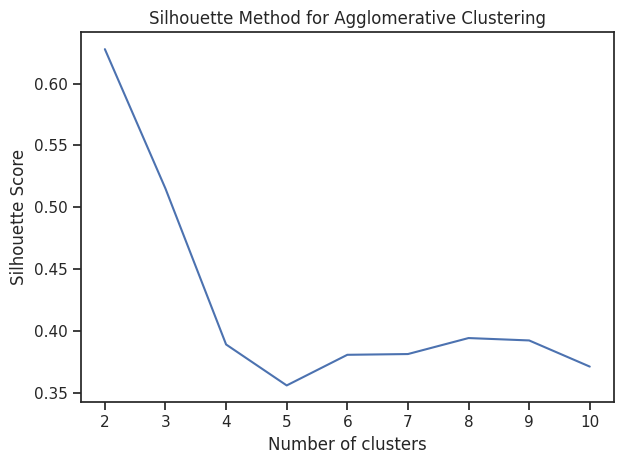

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

# Phương pháp Silhouette cho Agglomerative Clustering
sil_scores = []
for i in range(2, 11):
    model = AgglomerativeClustering(n_clusters=i)
    labels = model.fit_predict(machine_df_clus)
    silhouette_avg = silhouette_score(machine_df_clus, labels)
    sil_scores.append(silhouette_avg)

# Vẽ đồ thị Silhouette
plt.plot(range(2, 11), sil_scores)
plt.title('Silhouette Method for Agglomerative Clustering')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.savefig('hac1.pdf', format='pdf')
plt.show()

In [ ]:
## Xây dựng mô hình
k     = 2
agg_model = AgglomerativeClustering(n_clusters = k, metric = 'euclidean', linkage = 'ward')
agg_model.fit(machine_df_clus)

AgglomerativeClustering(metric='euclidean')

In [ ]:
## Kết quả gom cụm khách hàng (AgglomerativeClustering() không có trọng tâm 'cluster_centers_')
machine_df_clus['cluster'] = agg_model.labels_

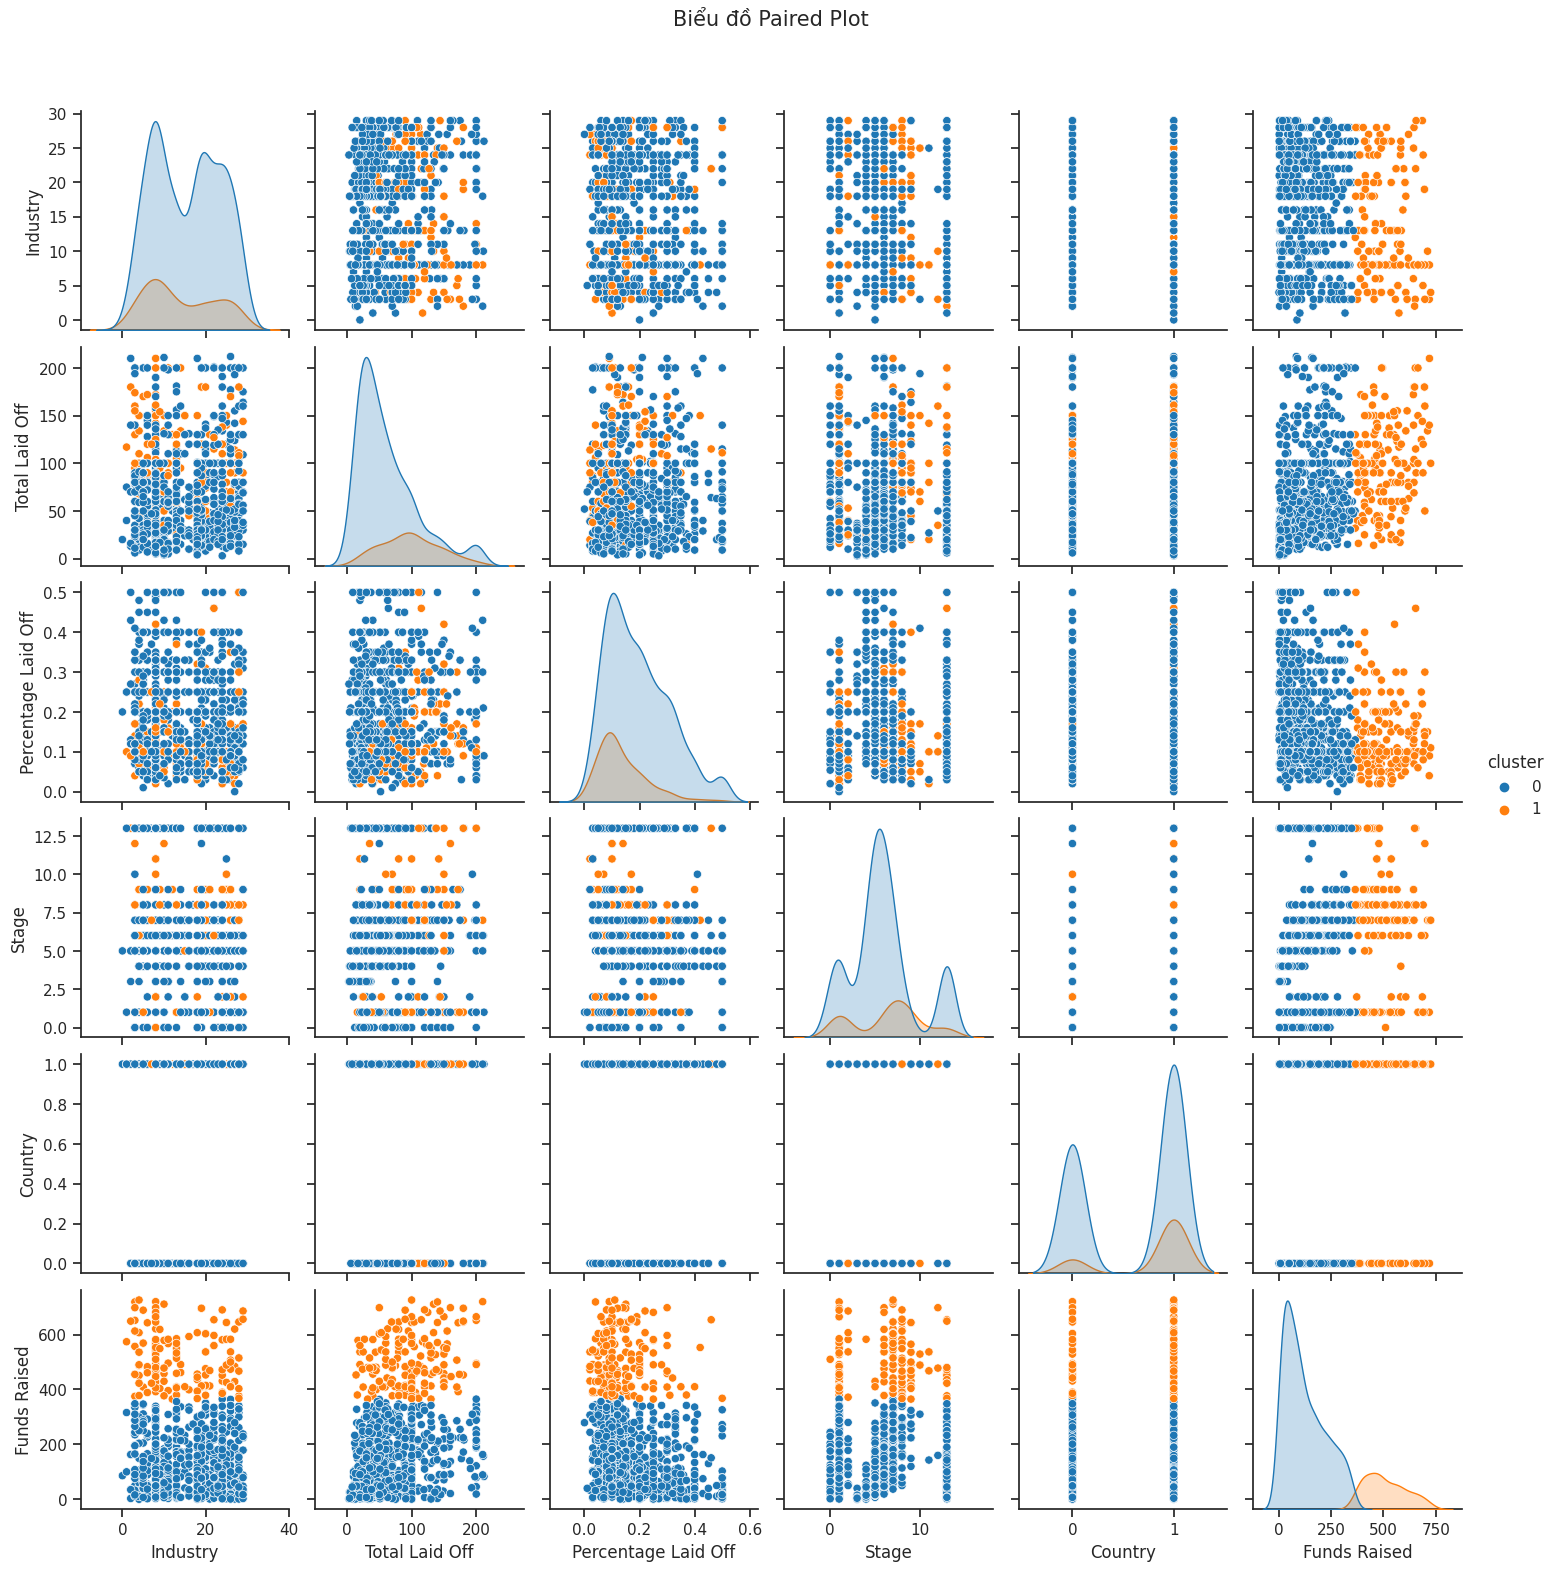

In [ ]:
sns.pairplot(machine_df_clus, hue = 'cluster',palette = 'tab10')
plt.suptitle('Biểu đồ Paired Plot', fontsize = 15, y =1.05)
plt.savefig('HAC2.pdf', format='pdf')
plt.show()

##Kmeans

In [ ]:
## Thư viện
import joblib             as jlb
import matplotlib.pyplot  as plt
import numpy              as np
import pandas             as pd
import seaborn            as sbn
import warnings
warnings.filterwarnings('ignore') # tắt những cảnh báo

from collections          import Counter
from sklearn.cluster      import KMeans

In [ ]:
column_to_drop = ['cluster']
machine_df_clus = machine_df_clus.drop(column_to_drop, axis=1)

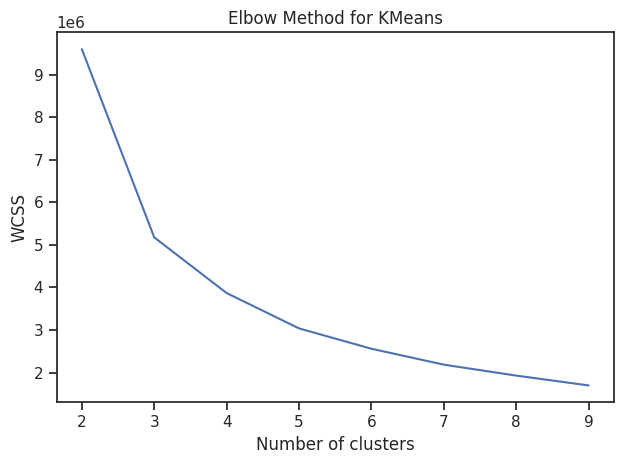

In [ ]:
# Phương pháp Elbow cho KMeans
wcss = []
for i in range(2,10):
    kmeans_model = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans_model.fit(machine_df_clus)
    wcss.append(kmeans_model.inertia_)

# Vẽ đồ thị Elbow
plt.plot(range(2, 10), wcss)
plt.title('Elbow Method for KMeans')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

plt.tight_layout()
plt.savefig('Kmean1.pdf', format='pdf')

In [ ]:
k     = 3
kmeans_model = KMeans(n_clusters = k)
kmeans_model.fit(machine_df_clus)  # xây dựng mô hình

KMeans(n_clusters=3)

In [ ]:
## Kết quả gom cụm khách hàng
centroids       = kmeans_model.cluster_centers_
machine_df_clus['cluster'] = kmeans_model.labels_
print(machine_df_clus.head(10))

print('\nKích thước các clusters:', Counter(kmeans_model.labels_))
print('\n2 clusters lớn nhất:', Counter(kmeans_model.labels_).most_common(2))

    Industry  Total Laid Off  Percentage Laid Off  Stage  Country  \
1         12             130                 0.20      9        1   
2         13             119                 0.17     13        1   
4         25             140                 0.09      0        1   
5          5              21                 0.28      4        0   
7         20              35                 0.10      4        0   
9          8              80                 0.03     11        1   
10         8             172                 0.14      1        1   
11         5              84                 0.28      1        1   
12         0              20                 0.20      5        1   
13        13             114                 0.05      7        1   

    Funds Raised  cluster  
1          365.0        2  
2          218.0        2  
4           32.0        0  
5           16.0        0  
7           64.0        0  
9          537.0        1  
10         392.0        1  
11         272.0

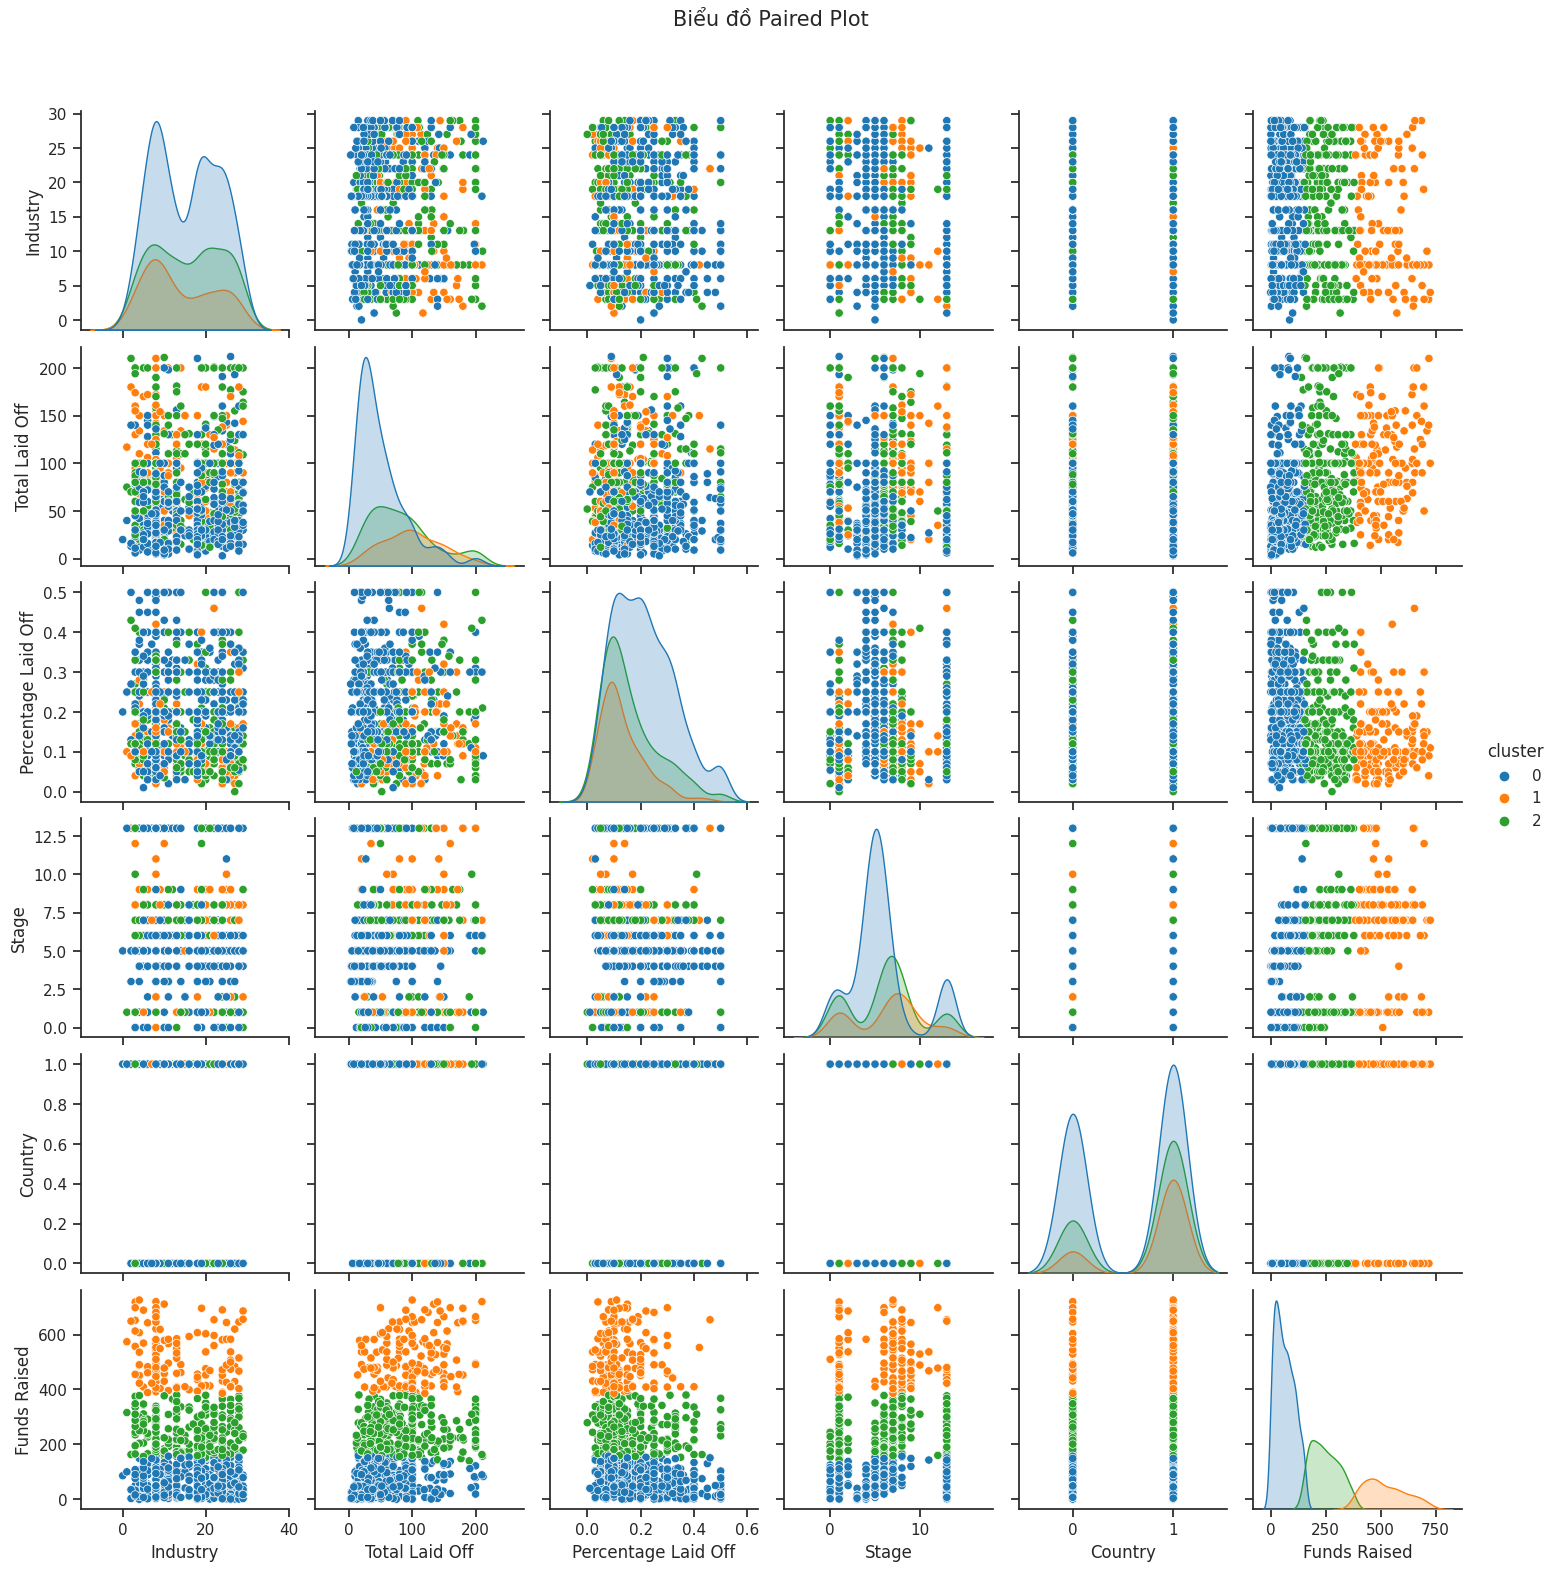

In [ ]:
sns.pairplot(machine_df_clus, hue = 'cluster',palette = 'tab10')
plt.suptitle('Biểu đồ Paired Plot', fontsize = 15, y =1.05)


plt.savefig('kmean2.pdf', format='pdf')
plt.show()

##K-Prototypes

In [ ]:
!pip install kmodes
!pip install yellowbrick

In [ ]:
column_to_drop = ['cluster']
machine_df_clus = machine_df_clus.drop(column_to_drop, axis=1)

In [ ]:
machine_df_clus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 924 entries, 1 to 1355
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Industry             924 non-null    int64  
 1   Total Laid Off       924 non-null    int64  
 2   Percentage Laid Off  924 non-null    float64
 3   Stage                924 non-null    int64  
 4   Country              924 non-null    int64  
 5   Funds Raised         924 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 82.8 KB


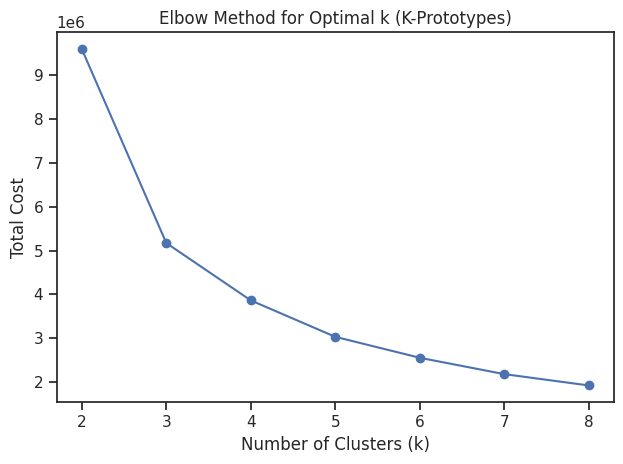

In [ ]:
from kmodes.kprototypes import KPrototypes
cost = []
for k in range(2, 9):
    kproto = KPrototypes(n_clusters=k, init='Cao', random_state=42)
    clusters = kproto.fit_predict(machine_df_clus, categorical=[0,3,4])  # Chỉ định cột nào là dữ liệu phân loại
    cost.append(kproto.cost_)

# Vẽ đồ thị
plt.plot(range(2, 9), cost, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Total Cost')
plt.title('Elbow Method for Optimal k (K-Prototypes)')

plt.tight_layout()
plt.savefig('kpro.pdf', format='pdf')
plt.show()

In [ ]:
kproto = KPrototypes(n_clusters = 3, init = 'Cao')
clusters = kproto.fit_predict(machine_df_clus, categorical = [0,3,4])
print('Cluster Centers: \n', kproto.cluster_centroids_)

Cluster Centers: 
 [[5.07852883e+01 2.13268390e-01 6.36308151e+01 8.00000000e+00
  5.00000000e+00 1.00000000e+00]
 [8.45513308e+01 1.61444867e-01 2.47568441e+02 8.00000000e+00
  7.00000000e+00 1.00000000e+00]
 [9.98987342e+01 1.31107595e-01 5.19812658e+02 8.00000000e+00
  1.00000000e+00 1.00000000e+00]]


In [ ]:
machine_df_clus['cluster'] = clusters

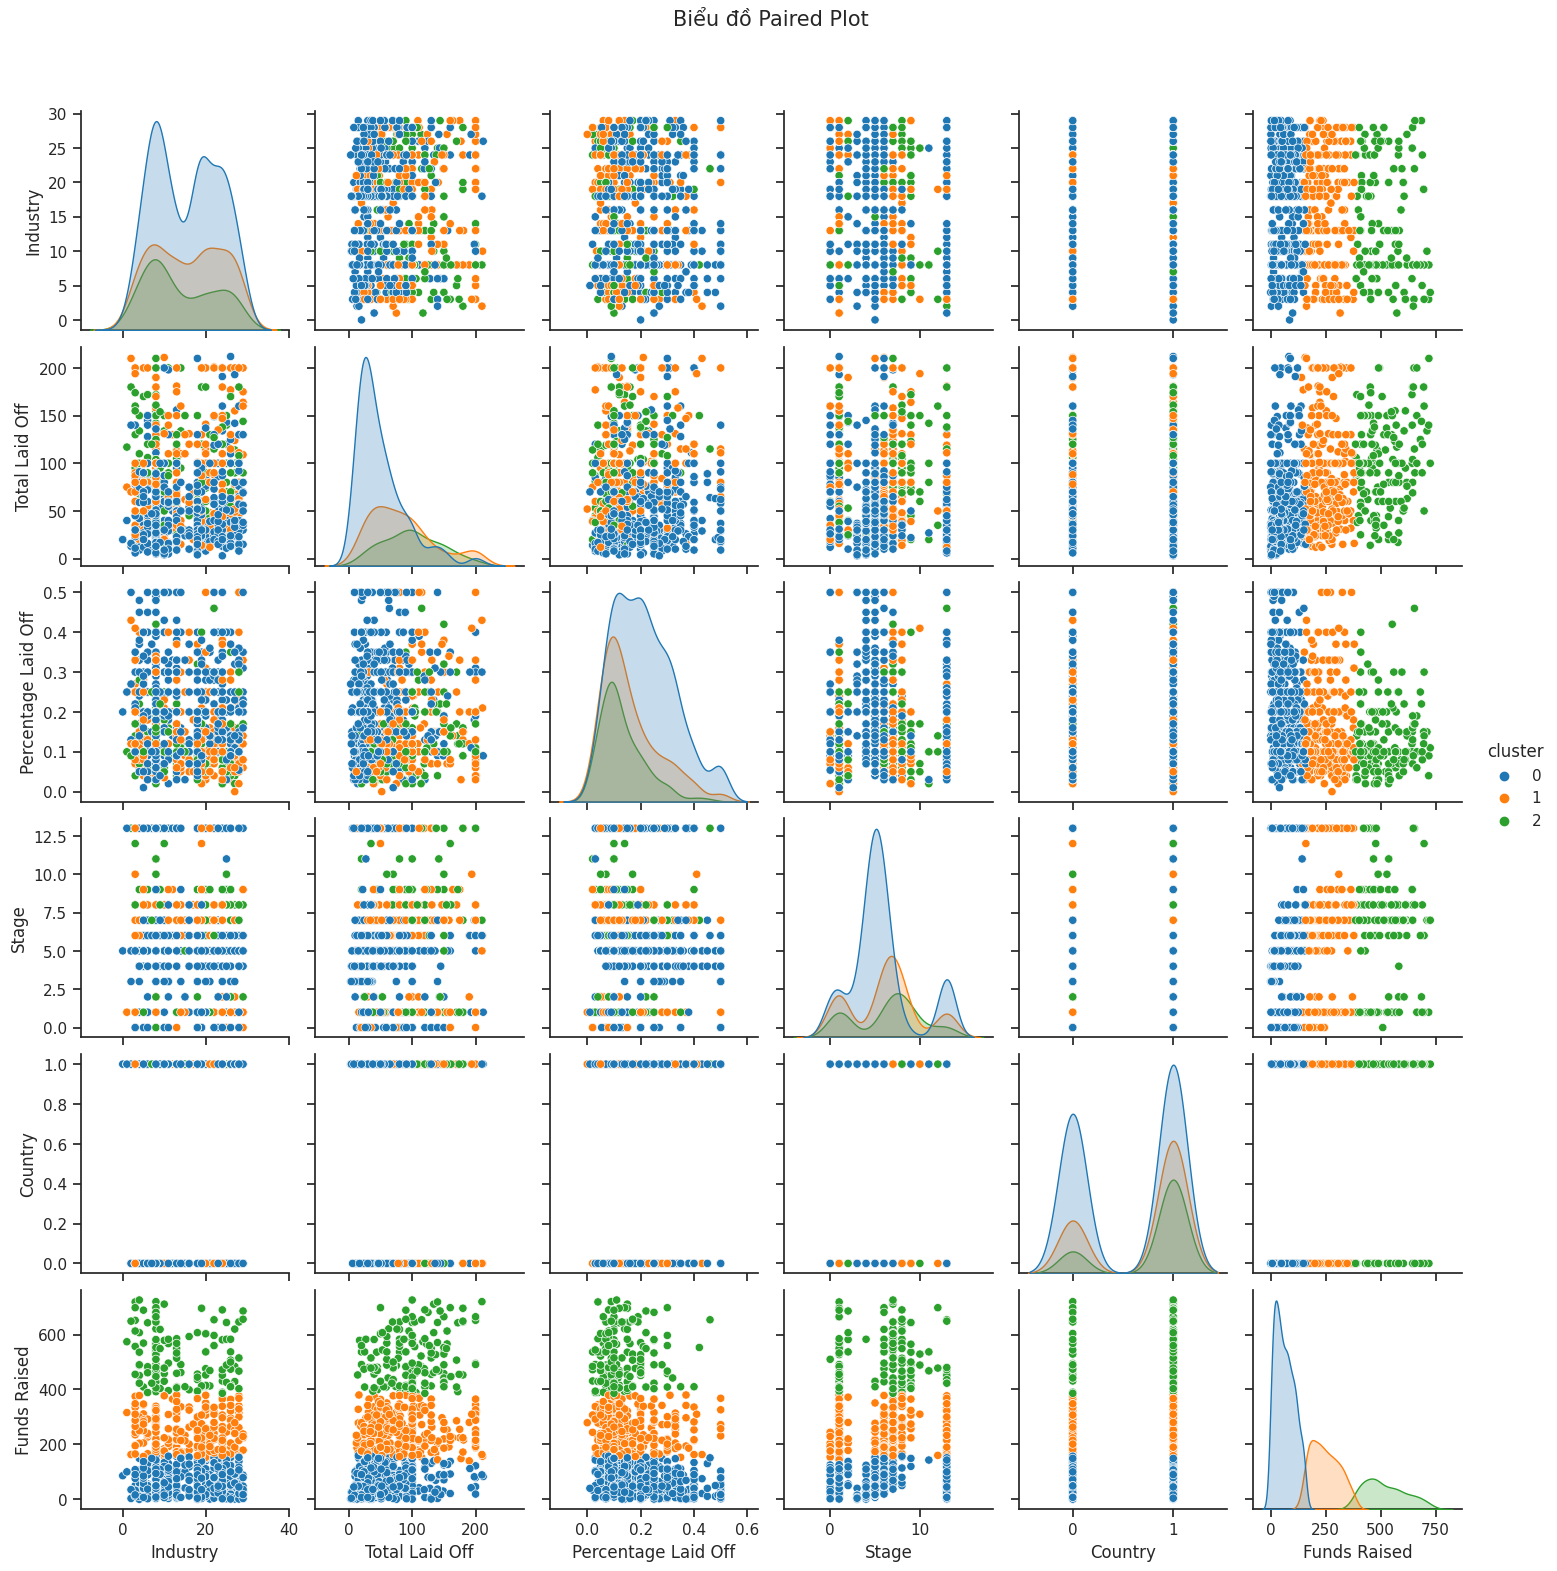

In [ ]:
sns.pairplot(machine_df_clus, hue = 'cluster',palette = 'tab10')
plt.suptitle('Biểu đồ Paired Plot', fontsize = 15, y =1.05)

plt.savefig('kpro2.pdf', format='pdf')
plt.show()

##Lựa chọn giải pháp

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Gán nhãn cho dữ liệu bằng cả hai mô hình
kmeans_labels = kmeans_model.fit_predict(machine_df_clus)
agg_labels = agg_model.fit_predict(machine_df_clus)
kproto_labels = kproto.fit_predict(machine_df_clus.values, categorical=[0, 3, 4])  # Chỉ định các cột phân loại

# Đánh giá mô hình bằng silhouette score
silhouette_kmeans = silhouette_score(machine_df_clus, kmeans_labels)
silhouette_agg = silhouette_score(machine_df_clus, agg_labels)
silhouette_kproto = silhouette_score(machine_df_clus, kproto_labels)

# Đánh giá mô hình bằng Davies-Bouldin index
db_index_kmeans = davies_bouldin_score(machine_df_clus, kmeans_labels)
db_index_agg = davies_bouldin_score(machine_df_clus, agg_labels)
db_index_kproto = davies_bouldin_score(machine_df_clus, kproto_labels)

# Đánh giá mô hình bằng Calinski-Harabasz index
ch_index_kmeans = calinski_harabasz_score(machine_df_clus, kmeans_labels)
ch_index_agg = calinski_harabasz_score(machine_df_clus, agg_labels)
ch_index_kproto = calinski_harabasz_score(machine_df_clus, kproto_labels)

# In kết quả
print("KMeans Silhouette Score:", silhouette_kmeans)
print("Agglomerative Clustering Silhouette Score:", silhouette_agg)
print("KPrototypes Clustering Silhouette Score:", silhouette_kproto)

print("\nKMeans Davies-Bouldin Index:", db_index_kmeans)
print("Agglomerative Clustering Davies-Bouldin Index:", db_index_agg)
print("KPrototypes Clustering Davies-Bouldin Index:", db_index_kproto)

print("\nKMeans Calinski-Harabasz Index:", ch_index_kmeans)
print("Agglomerative Clustering Calinski-Harabasz Index:", ch_index_agg)
print("KPrototypes Clustering Calinski-Harabasz Index:", ch_index_kproto)

### Mô hình hồi quy theo time-series